<a href="https://colab.research.google.com/github/PubuthPrajeshwara/FDM_Accident_severity_System/blob/main/FDMProjectFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.metrics import (accuracy_score,
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
!pip install dabl -Uqqq

In [ ]:
!pip install fancyimpute

In [ ]:
!pip install scikit-learn pandas numpy

In [ ]:
!pip install imbalanced-learn

In [ ]:
#read the dataset
df = pd.read_csv("/content/RTA Dataset.csv")
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [ ]:
print(df.dtypes)

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

In [ ]:
#check the shape of the data frame
df.shape

(12316, 32)

In [ ]:
#check for null values in df
df.isnull().sum ()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [ ]:
#checking for duplicate values
df.duplicated().sum()

0

In [ ]:
# Convert the 'Time' column to timedelta format and extract total seconds
df['Time'] = pd.to_timedelta(df['Time']).dt.total_seconds()

# Display the updated dataframe with the new 'Time_in_seconds' column
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,61320.0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,61320.0,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,61320.0,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,3960.0,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,3960.0,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [ ]:
print(df.dtypes)

Time                           float64
Day_of_week                     object
Age_band_of_driver              object
Sex_of_driver                   object
Educational_level               object
Vehicle_driver_relation         object
Driving_experience              object
Type_of_vehicle                 object
Owner_of_vehicle                object
Service_year_of_vehicle         object
Defect_of_vehicle               object
Area_accident_occured           object
Lanes_or_Medians                object
Road_allignment                 object
Types_of_Junction               object
Road_surface_type               object
Road_surface_conditions         object
Light_conditions                object
Weather_conditions              object
Type_of_collision               object
Number_of_vehicles_involved      int64
Number_of_casualties             int64
Vehicle_movement                object
Casualty_class                  object
Sex_of_casualty                 object
Age_band_of_casualty     

In [ ]:
#change the data type of Time to 'Object'
df['Time'] = df['Time'].astype(str)
df.dtypes

,0
Time,object
Day_of_week,object
Age_band_of_driver,object
Sex_of_driver,object
Educational_level,object
Vehicle_driver_relation,object
Driving_experience,object
Type_of_vehicle,object
Owner_of_vehicle,object
Service_year_of_vehicle,object


In [ ]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,61320.0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,61320.0,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,61320.0,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,3960.0,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,3960.0,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [ ]:
# describe categorical columns
df.describe(include='object')

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,...,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,...,13,4,3,6,4,7,5,9,20,3
top,55800.0,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,...,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415


In [ ]:
#total number of categorical data columns in the data frame
column = df.columns
# all the categorical columns
cat_columns = [colname for colname in df.select_dtypes(["object", "category"])]
len(cat_columns)

30

In [ ]:
df.groupby('Accident_severity').size()

,0
Accident_severity,
Fatal injury,158
Serious Injury,1743
Slight Injury,10415


In [ ]:
#importing dabl library to simplify the process of exploratory data analysis (EDA) and preprocessing
# Unique Features, Highly Correlated Features, Features with Missing Values, etc.
import dabl
dabl.detect_types(df)

/usr/local/lib/python3.10/dist-packages/dabl/preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
/usr/local/lib/python3.10/dist-packages/dabl/preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
/usr/local/lib/python3.10/dist-packages/dabl/preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
/usr/local/lib/python3.10/dist-packages/dabl/preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling 

,continuous,dirty_float,low_card_int_ordinal,low_card_int_categorical,categorical,date,free_string,useless
Time,True,False,False,False,False,False,False,False
Day_of_week,False,False,False,False,True,False,False,False
Age_band_of_driver,False,False,False,False,True,False,False,False
Sex_of_driver,False,False,False,False,True,False,False,False
Educational_level,False,False,False,False,True,False,False,False
Vehicle_driver_relation,False,False,False,False,True,False,False,False
Driving_experience,False,False,False,False,True,False,False,False
Type_of_vehicle,False,False,False,False,True,False,False,False
Owner_of_vehicle,False,False,False,False,True,False,False,False
Service_year_of_vehicle,False,False,False,False,True,False,False,False


In [ ]:
#droping the 2 columns
df_copy1 = df.drop(['Fitness_of_casuality', 'Defect_of_vehicle'], axis=1)
df_copy1.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,61320.0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,2,Going straight,na,na,na,na,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,61320.0,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,2,Going straight,na,na,na,na,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,61320.0,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,2,Going straight,Driver or rider,Male,31-50,3,Driver,Not a Pedestrian,Changing lane to the left,Serious Injury
3,3960.0,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,2,Going straight,Pedestrian,Female,18-30,3,Driver,Not a Pedestrian,Changing lane to the right,Slight Injury
4,3960.0,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,2,Going straight,na,na,na,na,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [ ]:
df_copy1.shape

(12316, 30)

In [ ]:
#finding the no of unique values per column in the original data frame
print("Unique values per column:")
df.nunique()

Unique values per column:


,0
Time,1074
Day_of_week,7
Age_band_of_driver,5
Sex_of_driver,3
Educational_level,7
Vehicle_driver_relation,4
Driving_experience,7
Type_of_vehicle,17
Owner_of_vehicle,4
Service_year_of_vehicle,6


In [ ]:
#creating a random colour palet to use in the data visualization
import random

def random_palette():
    # Creating a mix of multiple palettes
    base_palette = sns.color_palette("pastel", 5) + sns.color_palette("tab20c", 5) + sns.color_palette("tab20b", 5)
    # Sample specific colors from the base palette
    colour_list = random.sample(base_palette, 5)
    # Blend the palettes to create a new palette
    palette = sns.blend_palette([colour for colour in colour_list], 10)
    return palette

In [ ]:
def subplot(df, i, column, order=None, pallete=random_palette()):
    plt.subplot(2, 3 ,i)
    sns.barplot(data=df[column].value_counts().reset_index(), x = column, y = 'count', palette=random_palette(), order=order)
    plt.xticks(rotation=90)

<ipython-input-31-71b3a4194be9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[column].value_counts().reset_index(), x = column, y = 'count', palette=random_palette(), order=order)
<ipython-input-31-71b3a4194be9>:3: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(data=df[column].value_counts().reset_index(), x = column, y = 'count', palette=random_palette(), order=order)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a 

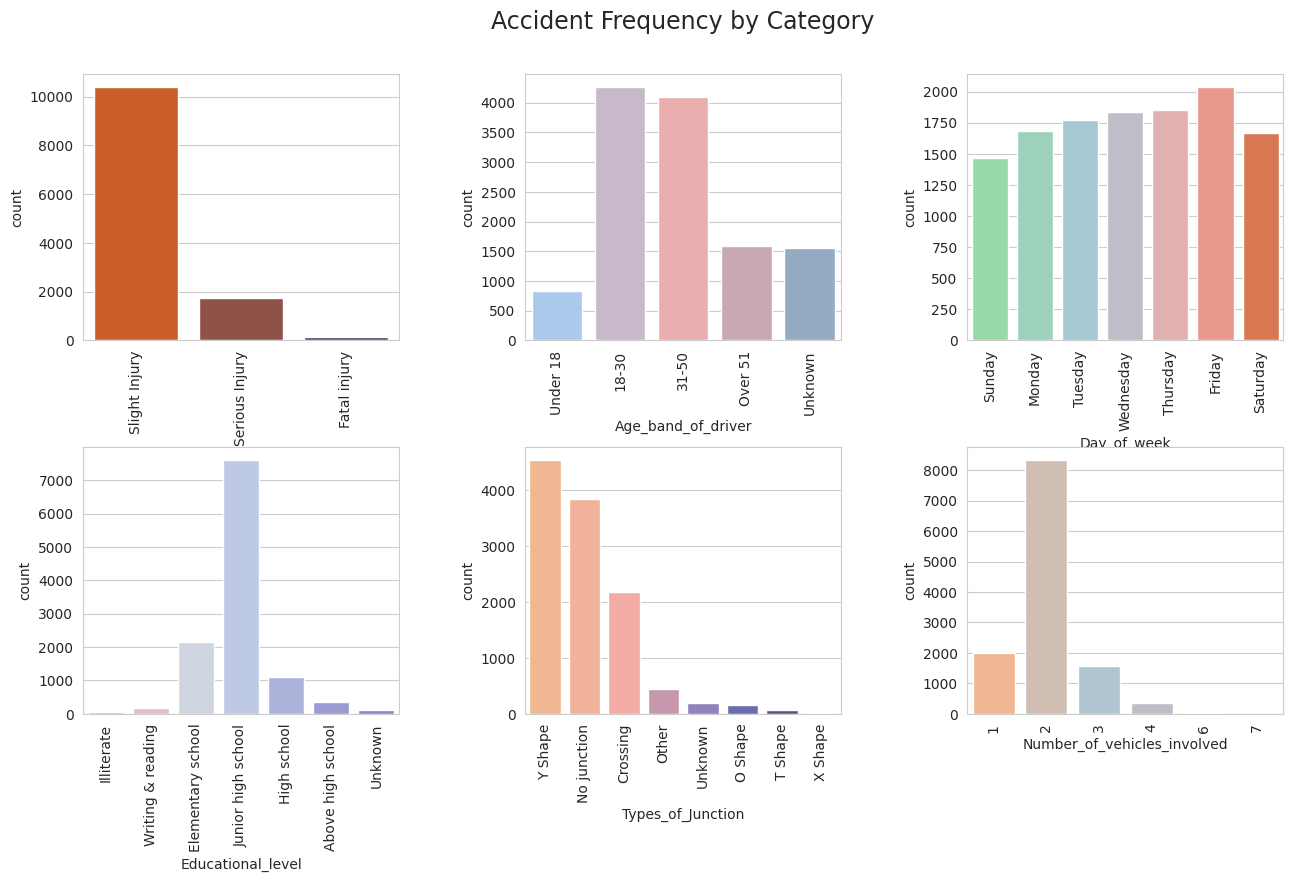

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(15, 8))
plt.suptitle("Accident Frequency by Category", fontsize=17)

subplot(df, i=1, column = 'Accident_severity')

age_order = ['Under 18', '18-30', '31-50', 'Over 51', 'Unknown']
subplot(df, i=2, column = 'Age_band_of_driver', order= age_order)

day_order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
subplot(df, i=3, column = 'Day_of_week', order=day_order)

education_order= ["Illiterate", "Writing & reading", "Elementary school", "Junior high school","High school","Above high school","Unknown"]
subplot(df, i=4, column = 'Educational_level', order=education_order)

subplot(df, i=5, column = 'Types_of_Junction')
subplot(df, i=6, column = 'Number_of_vehicles_involved')

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame for "Slight injury"
slight_injury_df = df[df['Accident_severity'] == 'Slight Injury']

# Check if slight_injury_df is not empty
if slight_injury_df.empty:
    print("No data found for 'Slight Injury'. Please check the filtering criteria.")
else:
    print(f"Filtered data contains {len(slight_injury_df)} records for 'Slight Injury'.")

# List of categorical columns to analyze
categorical_columns = ['Age_band_of_driver', 'Type_of_collision', 'Types_of_Junction', 'Light_conditions', 'Weather_conditions']

# Set the plot style
sns.set_style('darkgrid')

# Create bar plots for categorical variables related to "Slight injury"
def plot_categorical_slight_injury(categorical_columns):
    num_columns = len(categorical_columns)
    num_rows = (num_columns // 2) + (num_columns % 2)  # Calculate number of rows needed
    plt.figure(figsize=(15, 5 * num_rows))  # Adjust figure size based on number of rows

    for i, column in enumerate(categorical_columns):
        plt.subplot(num_rows, 2, i + 1)  # Use dynamic rows
        sns.countplot(data=slight_injury_df, x=column, hue=column, palette='Set2', legend=False)
        plt.title(f'Slight Injury Counts by {column}')
        plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()

# Call the plotting function
plot_categorical_slight_injury(categorical_columns)

In [ ]:
#check the data types of the columns in df_copy1
print(df_copy1.dtypes)

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_severity              object
Work_of_casu

In [ ]:
#replace 'Unknown', 'unknown', 'NaN', ' '
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Copy the original dataframe
df_copy2 = df_copy1.copy()

# Replace 'Unknown' with 'Unknown' and other placeholders with 'Null'
df_copy2 = df_copy2.replace({
    'Unknown': 'Unknown',
    'unknown': 'Unknown',
    'nan': 'Null',
    'Nan': 'Null',
    ' ': 'Null',
    pd.NA: 'Null',
    None: 'Null'
})

# Store df_copy2 after replacing placeholders
print("DataFrame after replacing placeholders:")
df_copy2.head()

DataFrame after replacing placeholders:


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,61320.0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,2,Going straight,na,na,na,na,Null,Not a Pedestrian,Moving Backward,Slight Injury
1,61320.0,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,2,Going straight,na,na,na,na,Null,Not a Pedestrian,Overtaking,Slight Injury
2,61320.0,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Null,...,2,Going straight,Driver or rider,Male,31-50,3,Driver,Not a Pedestrian,Changing lane to the left,Serious Injury
3,3960.0,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Null,...,2,Going straight,Pedestrian,Female,18-30,3,Driver,Not a Pedestrian,Changing lane to the right,Slight Injury
4,3960.0,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Null,Owner,5-10yrs,...,2,Going straight,na,na,na,na,Null,Not a Pedestrian,Overtaking,Slight Injury


In [ ]:
df_copy2.shape

(12316, 30)

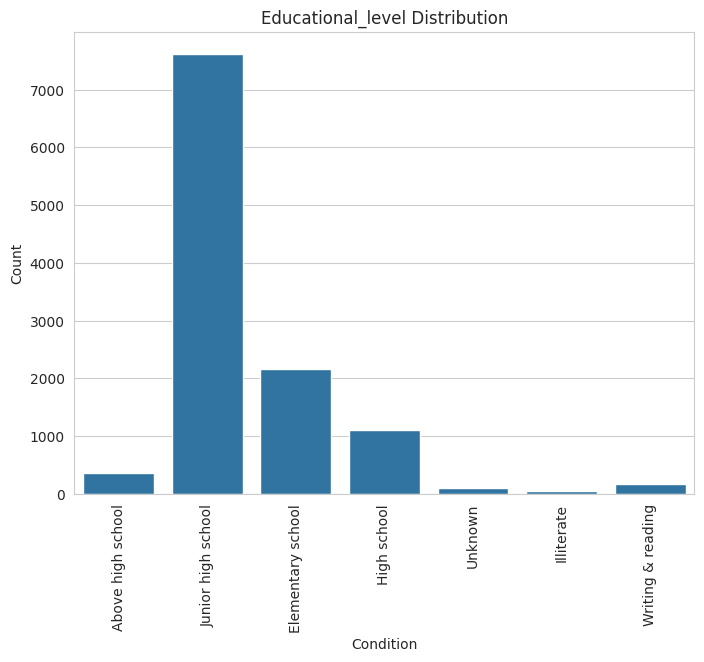

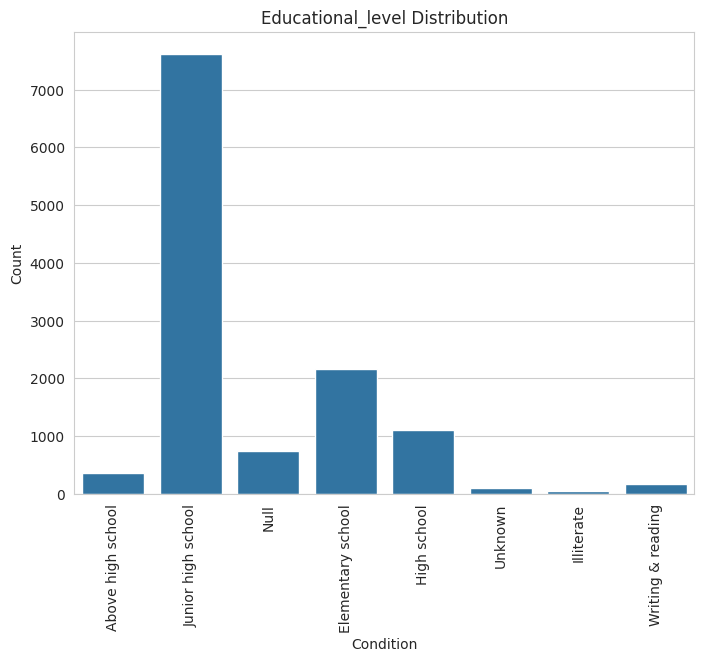

Educational_level
Junior high school    7619
Elementary school     2163
High school           1110
Null                   741
Above high school      362
Writing & reading      176
Unknown                100
Illiterate              45
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the unique values in the 'Educational_level' column
unique_conditions = df['Educational_level'].unique()

# Plotting the graph for all unique conditions
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Educational_level')
plt.title('Educational_level Distribution')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Get the unique values in the 'Educational_level' column
unique_conditions = df_copy2['Educational_level'].unique()

# Plotting the graph for all unique conditions
plt.figure(figsize=(8, 6))
sns.countplot(data=df_copy2, x='Educational_level')
plt.title('Educational_level Distribution')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Get the count of each unique value in 'Educational_level'
condition_counts1 = df_copy2['Educational_level'].value_counts()

# Display the counts
print(condition_counts1)

In [ ]:
#filling the null vaues of 'Educational_level' using the mode
df_copy1['Educational_level'] = df_copy1['Educational_level'].fillna(df['Educational_level'].mode()[0])

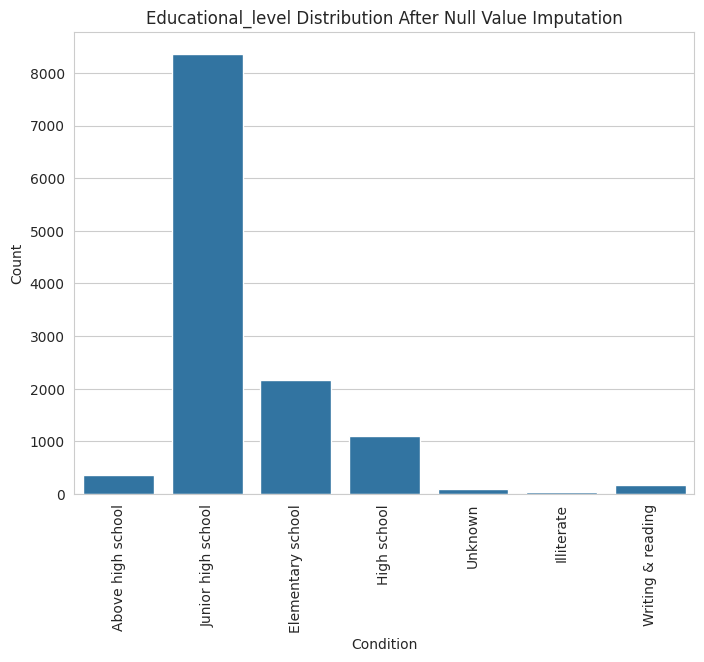

Educational_level
Junior high school    8360
Elementary school     2163
High school           1110
Above high school      362
Writing & reading      176
Unknown                100
Illiterate              45
Name: count, dtype: int64


In [ ]:
# Plot and count after null value imputation
unique_conditions = df_copy1['Educational_level'].unique()

# Plotting the graph for all unique conditions
plt.figure(figsize=(8, 6))
sns.countplot(data=df_copy1, x='Educational_level')
plt.title('Educational_level Distribution After Null Value Imputation')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Get the count of each unique value in 'Educational_level'
condition_counts1 = df_copy1['Educational_level'].value_counts()
print(condition_counts1)

In [ ]:
df_copy1.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


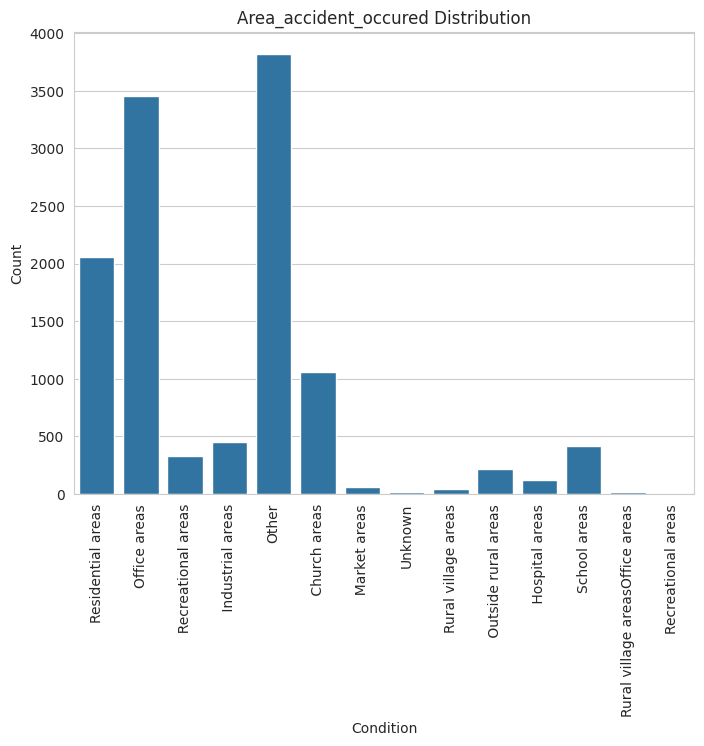

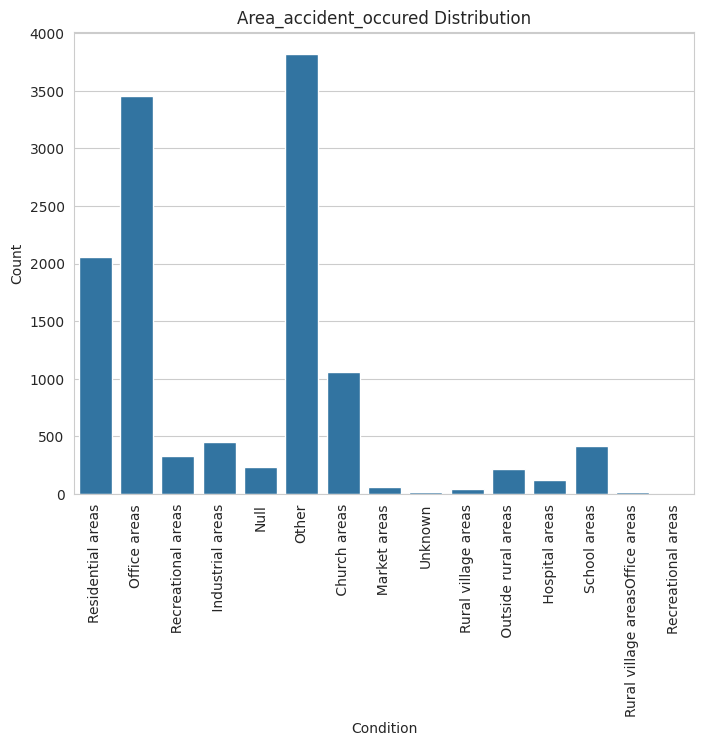

Area_accident_occured
Other                              3819
Office areas                       3451
Residential areas                  2060
 Church areas                      1060
 Industrial areas                   456
School areas                        415
  Recreational areas                327
Null                                239
 Outside rural areas                218
 Hospital areas                     121
  Market areas                       63
Rural village areas                  44
Unknown                              22
Rural village areasOffice areas      20
Recreational areas                    1
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the unique values in the 'Area_accident_occured' column
unique_conditions = df['Area_accident_occured'].unique()

# Plotting the graph for all unique conditions
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Area_accident_occured')
plt.title('Area_accident_occured Distribution')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Get the unique values in the 'Area_accident_occured' column
unique_conditions = df_copy2['Area_accident_occured'].unique()

# Plotting the graph for all unique conditions
plt.figure(figsize=(8, 6))
sns.countplot(data=df_copy2, x='Area_accident_occured')
plt.title('Area_accident_occured Distribution')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Get the count of each unique value in 'Area_accident_occured'
condition_counts1 = df_copy2['Area_accident_occured'].value_counts()

# Display the counts
print(condition_counts1)

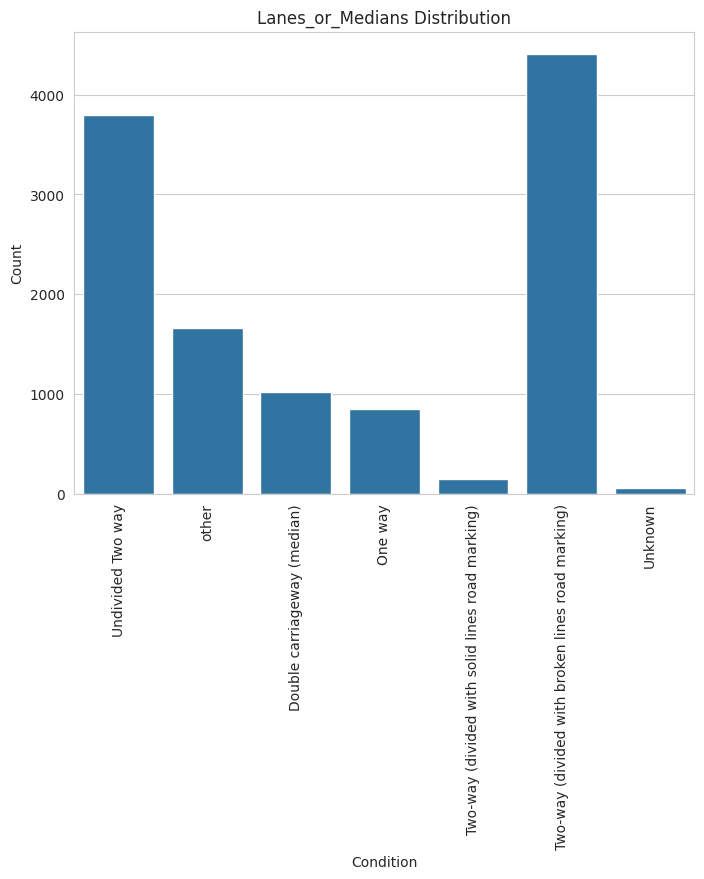

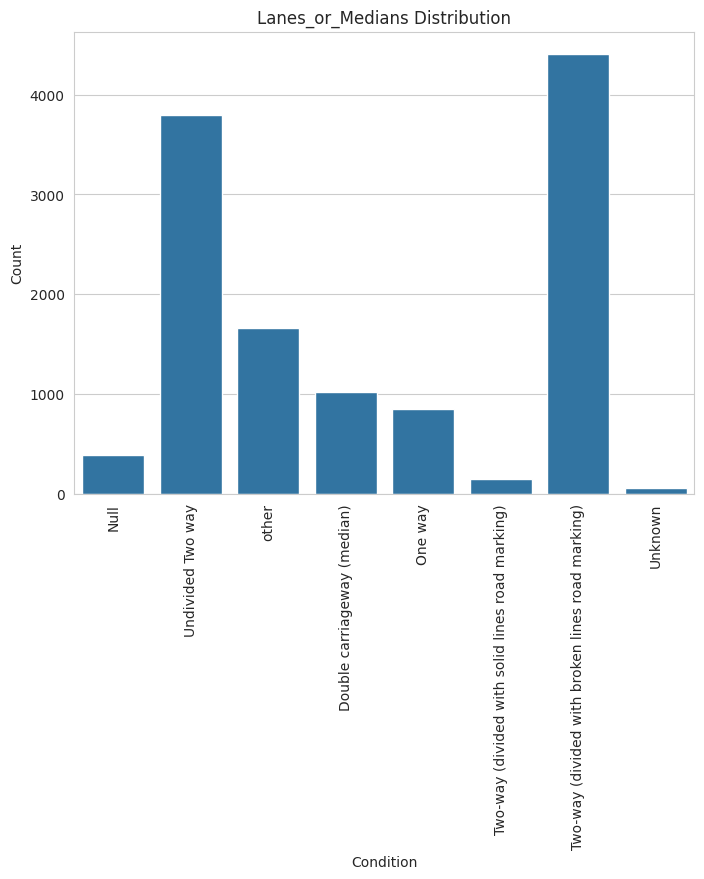

Lanes_or_Medians
Two-way (divided with broken lines road marking)    4411
Undivided Two way                                   3796
other                                               1660
Double carriageway (median)                         1020
One way                                              845
Null                                                 385
Two-way (divided with solid lines road marking)      142
Unknown                                               57
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the unique values in the 'Lanes_or_Medians' column
unique_conditions = df['Lanes_or_Medians'].unique()

# Plotting the graph for all unique conditions
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Lanes_or_Medians')
plt.title('Lanes_or_Medians Distribution')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Get the unique values in the 'Lanes_or_Medians' column
unique_conditions = df_copy2['Lanes_or_Medians'].unique()

# Plotting the graph for all unique conditions
plt.figure(figsize=(8, 6))
sns.countplot(data=df_copy2, x='Lanes_or_Medians')
plt.title('Lanes_or_Medians Distribution')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Get the count of each unique value in 'Lanes_or_Medians'
condition_counts1 = df_copy2['Lanes_or_Medians'].value_counts()

# Display the counts
print(condition_counts1)

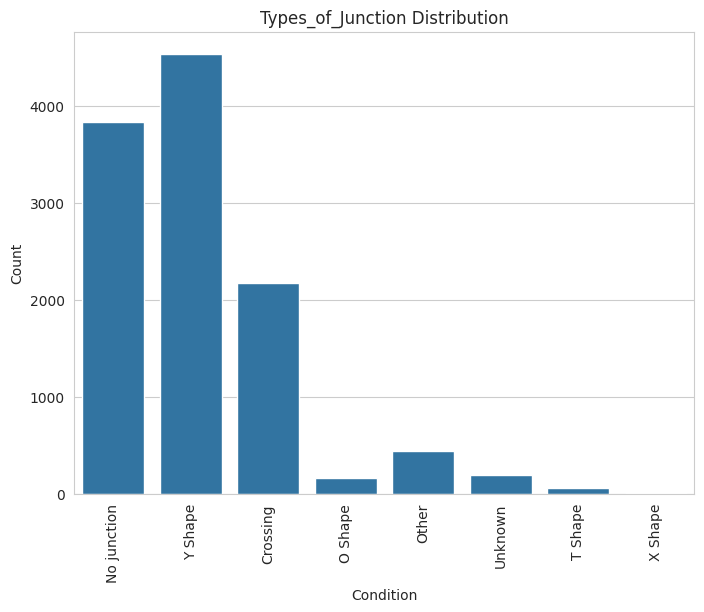

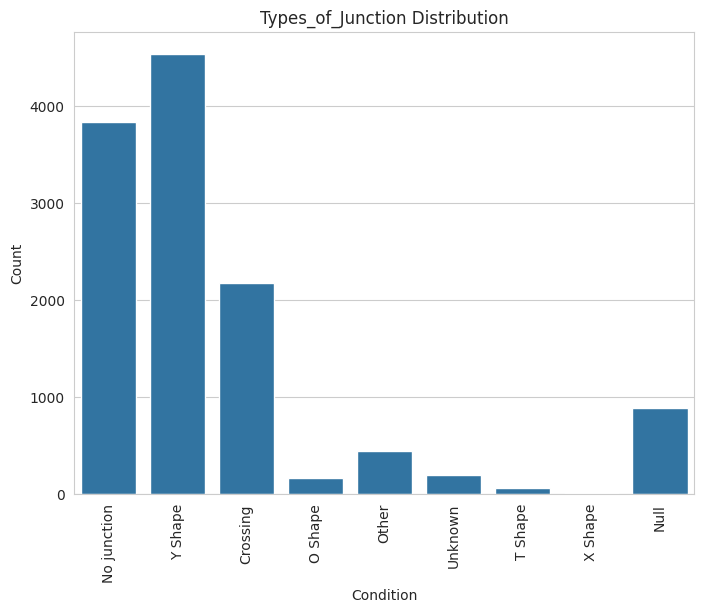

Types_of_Junction
Y Shape        4543
No junction    3837
Crossing       2177
Null            887
Other           445
Unknown         191
O Shape         164
T Shape          60
X Shape          12
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the unique values in the 'Types_of_Junction' column
unique_conditions = df['Types_of_Junction'].unique()

# Plotting the graph for all unique conditions
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Types_of_Junction')
plt.title('Types_of_Junction Distribution')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Get the unique values in the 'Types_of_Junction' column
unique_conditions = df_copy2['Types_of_Junction'].unique()

# Plotting the graph for all unique conditions
plt.figure(figsize=(8, 6))
sns.countplot(data=df_copy2, x='Types_of_Junction')
plt.title('Types_of_Junction Distribution')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Get the count of each unique value in 'Types_of_Junction'
condition_counts1 = df_copy2['Types_of_Junction'].value_counts()

# Display the counts
print(condition_counts1)

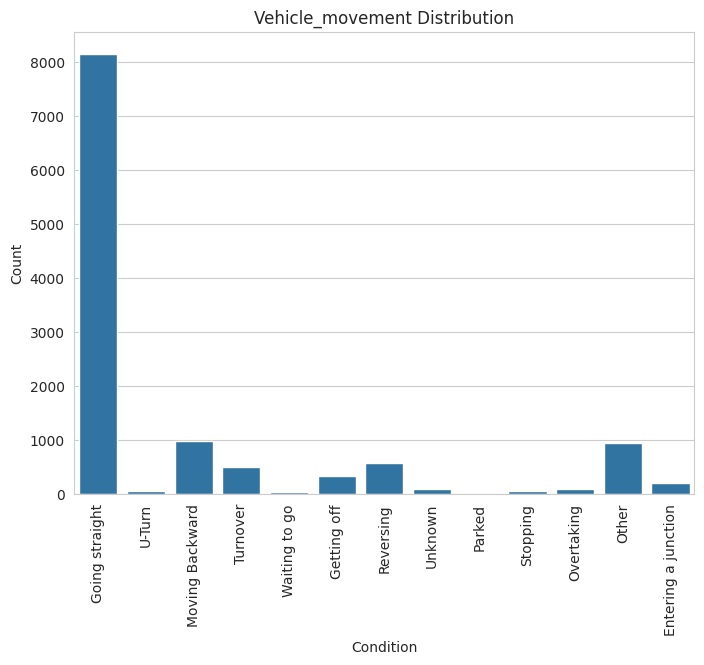

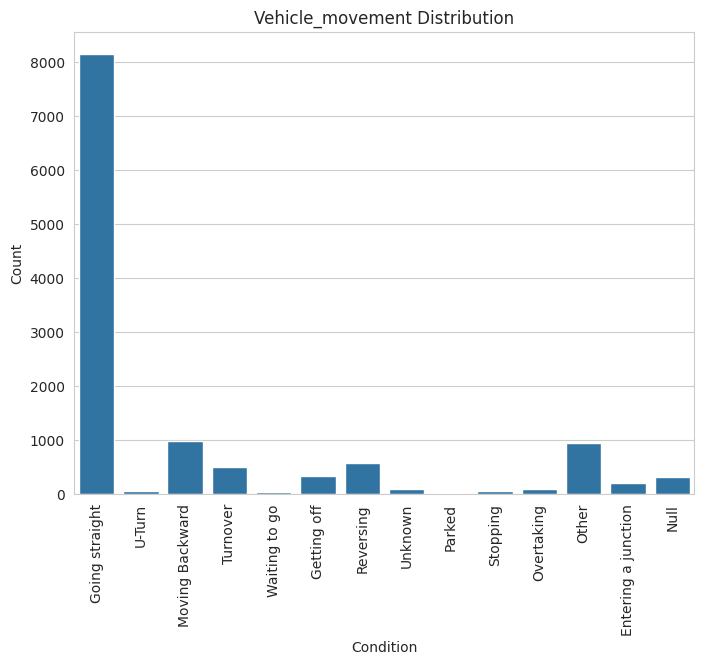

Vehicle_movement
Going straight         8158
Moving Backward         985
Other                   937
Reversing               563
Turnover                489
Getting off             339
Null                    308
Entering a junction     193
Overtaking               96
Unknown                  88
Stopping                 61
U-Turn                   50
Waiting to go            39
Parked                   10
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the unique values in the 'Vehicle_movement' column
unique_conditions = df['Vehicle_movement'].unique()

# Plotting the graph for all unique conditions
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Vehicle_movement')
plt.title('Vehicle_movement Distribution')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Get the unique values in the 'Vehicle_movement' column
unique_conditions = df_copy2['Vehicle_movement'].unique()

# Plotting the graph for all unique conditions
plt.figure(figsize=(8, 6))
sns.countplot(data=df_copy2, x='Vehicle_movement')
plt.title('Vehicle_movement Distribution')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Get the count of each unique value in 'Vehicle_movement'
condition_counts1 = df_copy2['Vehicle_movement'].value_counts()

# Display the counts
print(condition_counts1)

In [ ]:
#filling the null vaues of 'Vehicle_movement' using the mode
df_copy1['Vehicle_movement'] = df_copy1['Vehicle_movement'].fillna(df['Vehicle_movement'].mode()[0])

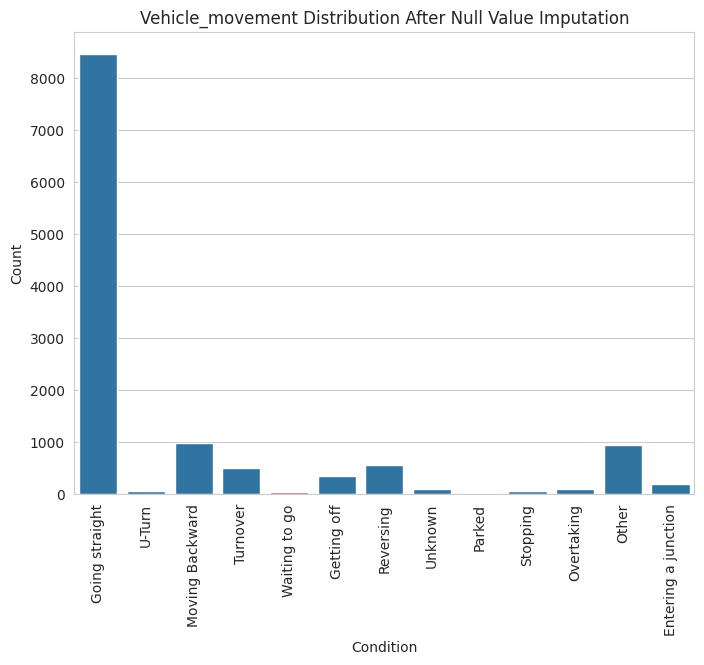

Vehicle_movement
Going straight         8466
Moving Backward         985
Other                   937
Reversing               563
Turnover                489
Getting off             339
Entering a junction     193
Overtaking               96
Unknown                  88
Stopping                 61
U-Turn                   50
Waiting to go            39
Parked                   10
Name: count, dtype: int64


In [ ]:
# Plot and count after null value imputation
unique_conditions = df_copy1['Vehicle_movement'].unique()

# Plotting the graph for all unique conditions
plt.figure(figsize=(8, 6))
sns.countplot(data=df_copy1, x='Vehicle_movement')
plt.title('Vehicle_movement Distribution After Null Value Imputation')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Get the count of each unique value in 'Vehicle_movement'
condition_counts1 = df_copy1['Vehicle_movement'].value_counts()
print(condition_counts1)

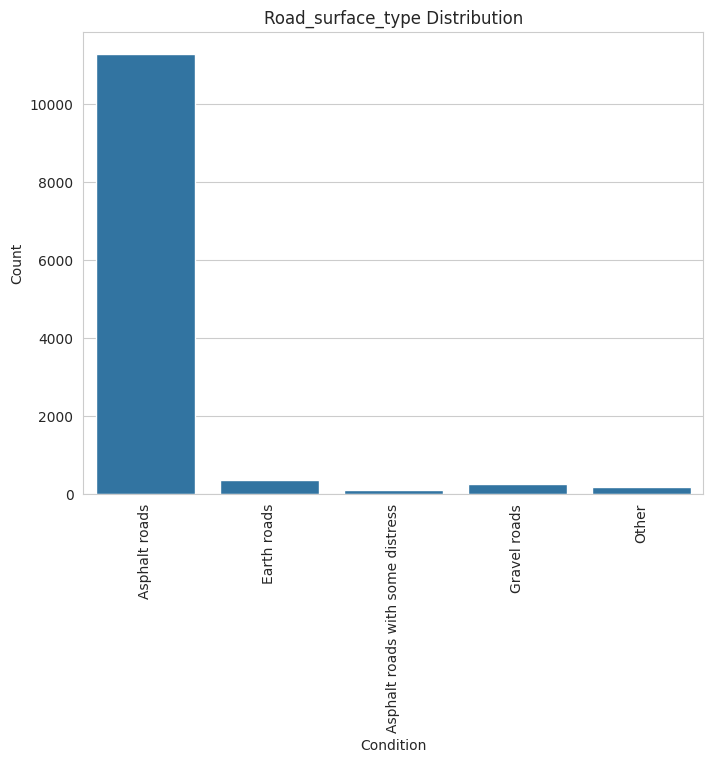

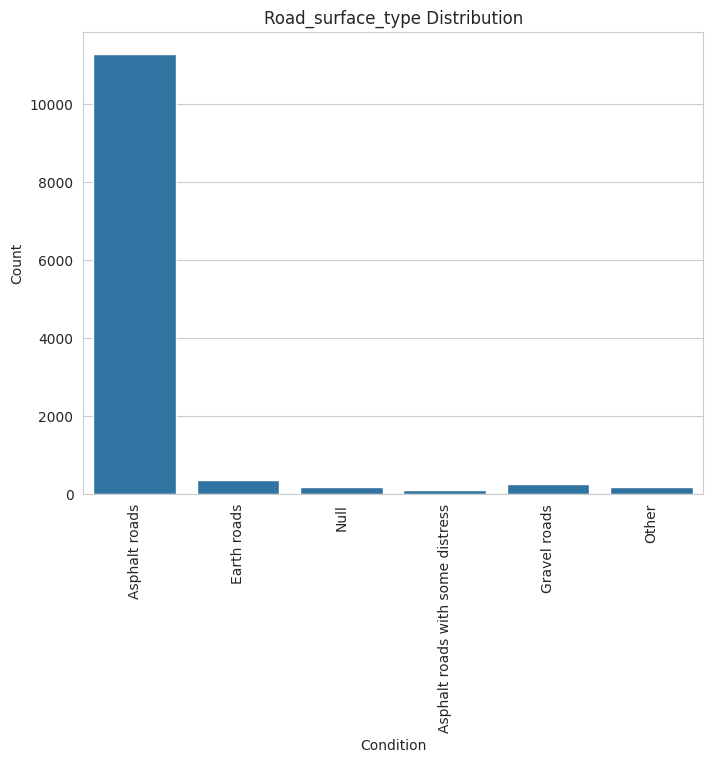

Road_surface_type
Asphalt roads                       11296
Earth roads                           358
Gravel roads                          242
Null                                  172
Other                                 167
Asphalt roads with some distress       81
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the unique values in the 'Road_surface_conditions' column
unique_conditions = df['Road_surface_type'].unique()

# Plotting the graph for all unique conditions
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Road_surface_type')
plt.title('Road_surface_type Distribution')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Get the unique values in the 'Road_surface_type' column
unique_conditions = df_copy2['Road_surface_type'].unique()

# Plotting the graph for all unique conditions
plt.figure(figsize=(8, 6))
sns.countplot(data=df_copy2, x='Road_surface_type')
plt.title('Road_surface_type Distribution')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Get the count of each unique value in 'Road_surface_conditions'
condition_counts1 = df_copy2['Road_surface_type'].value_counts()

# Display the counts
print(condition_counts1)

In [ ]:
#filling the null vaues of 'Road_surface_type' using the mode
df_copy1['Road_surface_type'] = df_copy1['Road_surface_type'].fillna(df['Road_surface_type'].mode()[0])

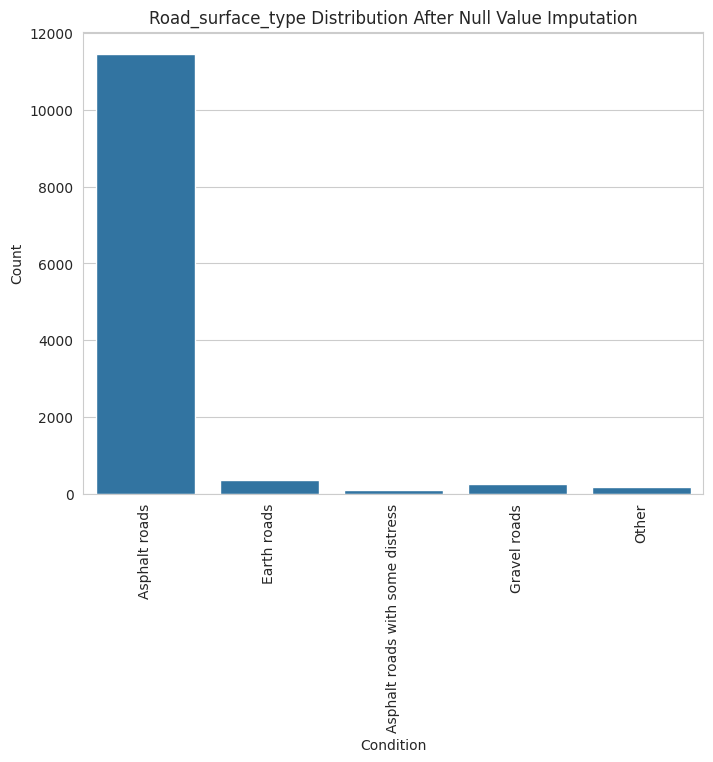

Road_surface_type
Asphalt roads                       11468
Earth roads                           358
Gravel roads                          242
Other                                 167
Asphalt roads with some distress       81
Name: count, dtype: int64


In [ ]:
# Plot and count after null value imputation
unique_conditions = df_copy1['Road_surface_type'].unique()

# Plotting the graph for all unique conditions
plt.figure(figsize=(8, 6))
sns.countplot(data=df_copy1, x='Road_surface_type')
plt.title('Road_surface_type Distribution After Null Value Imputation')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Get the count of each unique value in 'Road_surface_type'
condition_counts1 = df_copy1['Road_surface_type'].value_counts()
print(condition_counts1)

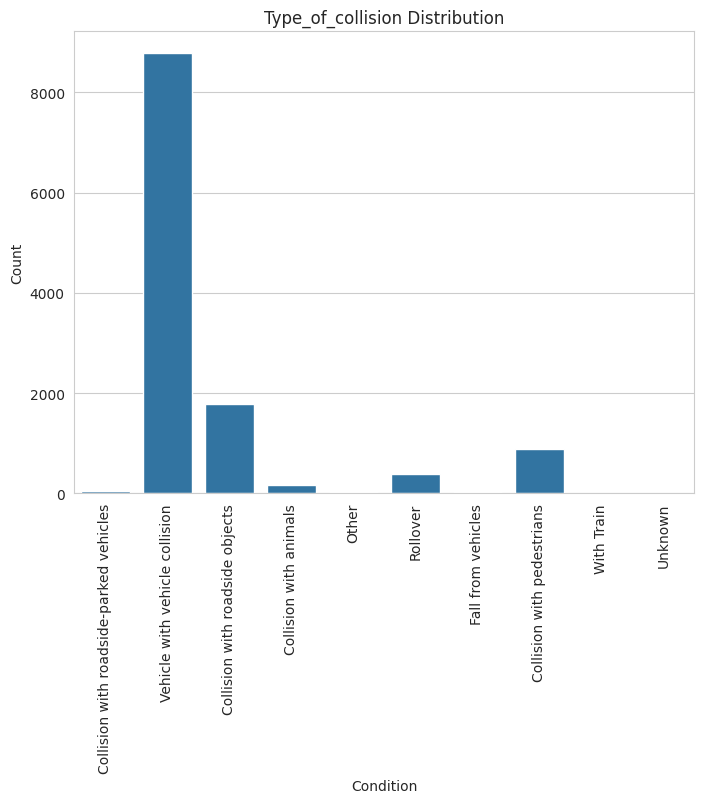

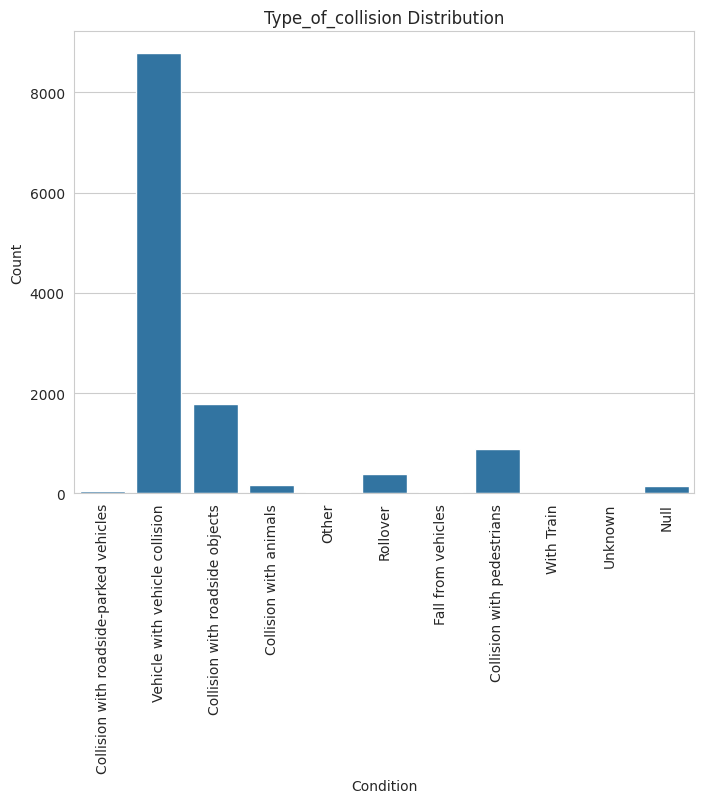

Type_of_collision
Vehicle with vehicle collision             8774
Collision with roadside objects            1786
Collision with pedestrians                  896
Rollover                                    397
Collision with animals                      171
Null                                        155
Collision with roadside-parked vehicles      54
Fall from vehicles                           34
Other                                        26
Unknown                                      14
With Train                                    9
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the unique values in the 'Type_of_collision' column
unique_conditions = df['Type_of_collision'].unique()

# Plotting the graph for all unique conditions
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Type_of_collision')
plt.title('Type_of_collision Distribution')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Get the unique values in the 'Type_of_collision' column
unique_conditions = df_copy2['Type_of_collision'].unique()

# Plotting the graph for all unique conditions
plt.figure(figsize=(8, 6))
sns.countplot(data=df_copy2, x='Type_of_collision')
plt.title('Type_of_collision Distribution')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Get the count of each unique value in 'Type_of_collision'
condition_counts1 = df_copy2['Type_of_collision'].value_counts()

# Display the counts
print(condition_counts1)

In [ ]:
#filling the null vaues of 'Type_of_collision' using the mode
df_copy1['Type_of_collision'] = df_copy1['Type_of_collision'].fillna(df['Type_of_collision'].mode()[0])

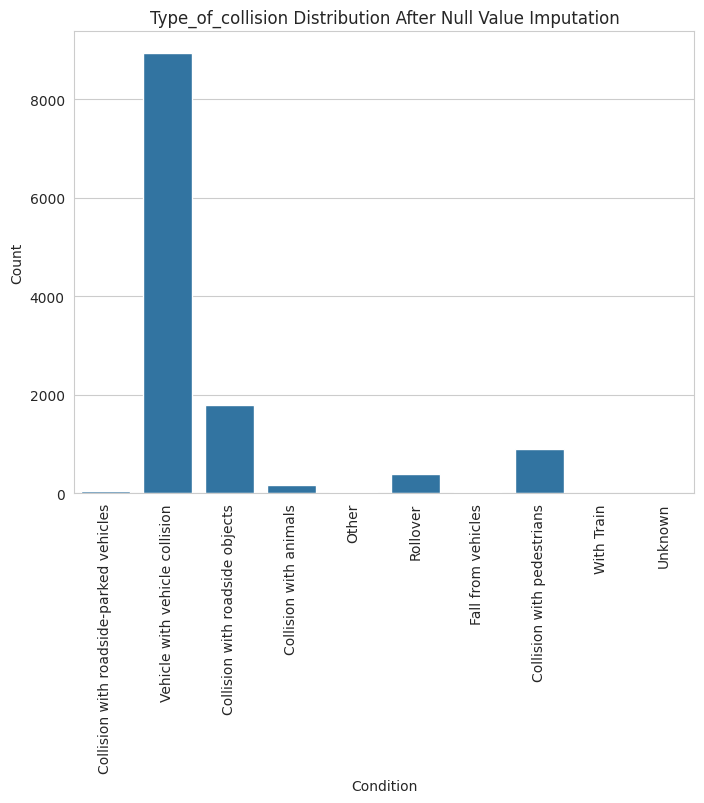

Type_of_collision
Vehicle with vehicle collision             8929
Collision with roadside objects            1786
Collision with pedestrians                  896
Rollover                                    397
Collision with animals                      171
Collision with roadside-parked vehicles      54
Fall from vehicles                           34
Other                                        26
Unknown                                      14
With Train                                    9
Name: count, dtype: int64


In [ ]:
# Plot and count after null value imputation
unique_conditions = df_copy1['Type_of_collision'].unique()

# Plotting the graph for all unique conditions
plt.figure(figsize=(8, 6))
sns.countplot(data=df_copy1, x='Type_of_collision')
plt.title('Type_of_collision Distribution After Null Value Imputation')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Get the count of each unique value in 'Type_of_collision'
condition_counts1 = df_copy1['Type_of_collision'].value_counts()
print(condition_counts1)

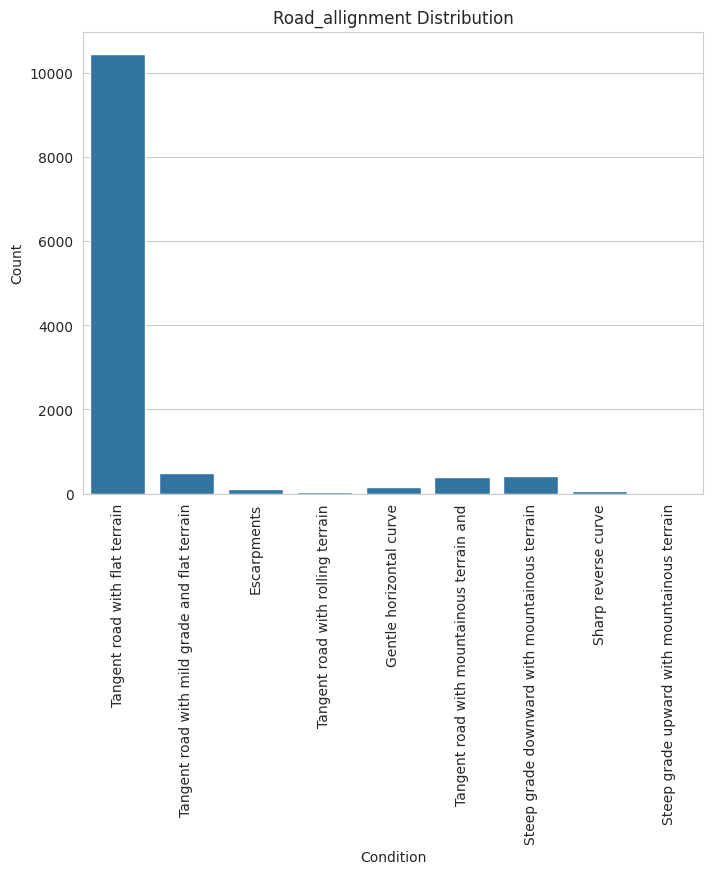

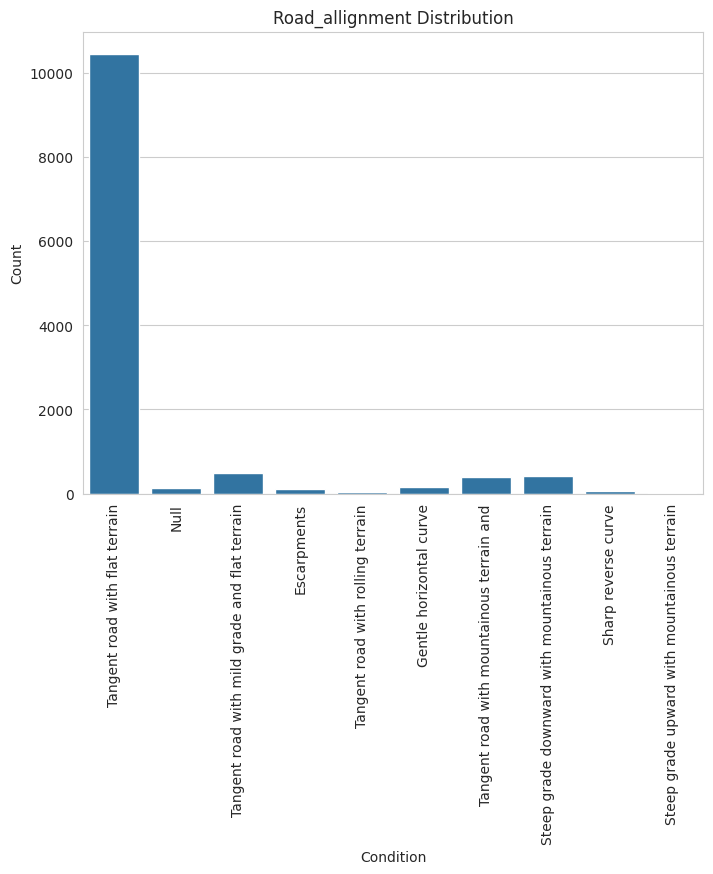

Road_allignment
Tangent road with flat terrain                   10459
Tangent road with mild grade and flat terrain      501
Steep grade downward with mountainous terrain      429
Tangent road with mountainous terrain and          396
Gentle horizontal curve                            163
Null                                               142
Escarpments                                        113
Sharp reverse curve                                 57
Tangent road with rolling terrain                   37
Steep grade upward with mountainous terrain         19
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the unique values in the 'Road_allignment' column
unique_conditions = df['Road_allignment'].unique()

# Plotting the graph for all unique conditions
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Road_allignment')
plt.title('Road_allignment Distribution')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Get the unique values in the 'Road_allignment' column
unique_conditions = df_copy2['Road_allignment'].unique()

# Plotting the graph for all unique conditions
plt.figure(figsize=(8, 6))
sns.countplot(data=df_copy2, x='Road_allignment')
plt.title('Road_allignment Distribution')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Get the count of each unique value in 'Road_allignment'
condition_counts1 = df_copy2['Road_allignment'].value_counts()

# Display the counts
print(condition_counts1)

In [ ]:
#filling the null vaues of 'Road_allignment' using the mode
df_copy1['Road_allignment'] = df_copy1['Road_allignment'].fillna(df['Road_allignment'].mode()[0])

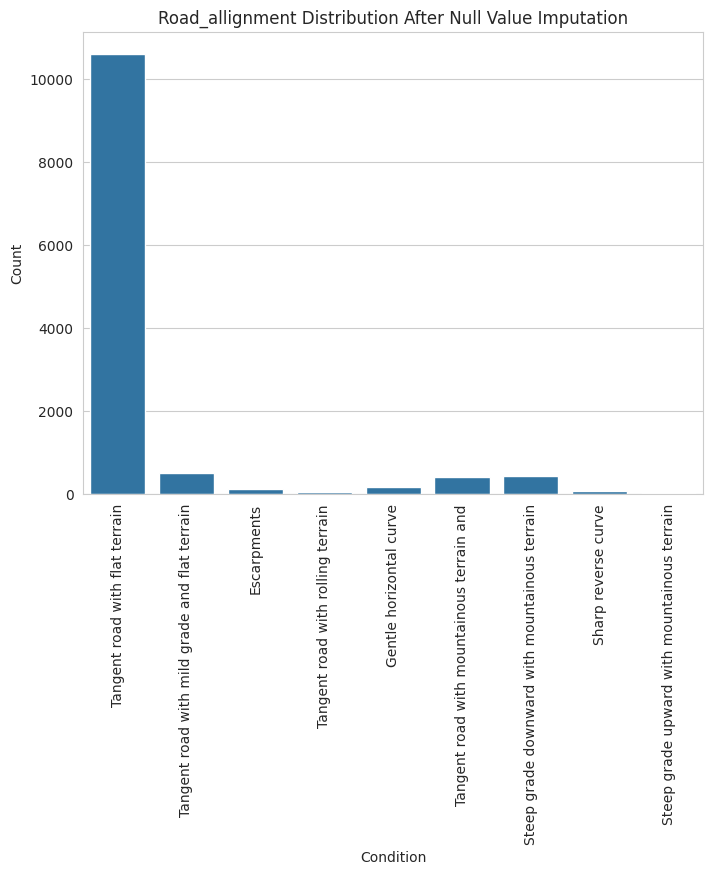

Road_allignment
Tangent road with flat terrain                   10601
Tangent road with mild grade and flat terrain      501
Steep grade downward with mountainous terrain      429
Tangent road with mountainous terrain and          396
Gentle horizontal curve                            163
Escarpments                                        113
Sharp reverse curve                                 57
Tangent road with rolling terrain                   37
Steep grade upward with mountainous terrain         19
Name: count, dtype: int64


In [ ]:
# Plot and count after null value imputation
unique_conditions = df_copy1['Road_allignment'].unique()

# Plotting the graph for all unique conditions
plt.figure(figsize=(8, 6))
sns.countplot(data=df_copy1, x='Road_allignment')
plt.title('Road_allignment Distribution After Null Value Imputation')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Get the count of each unique value in 'Road_allignment'
condition_counts1 = df_copy1['Road_allignment'].value_counts()
print(condition_counts1)

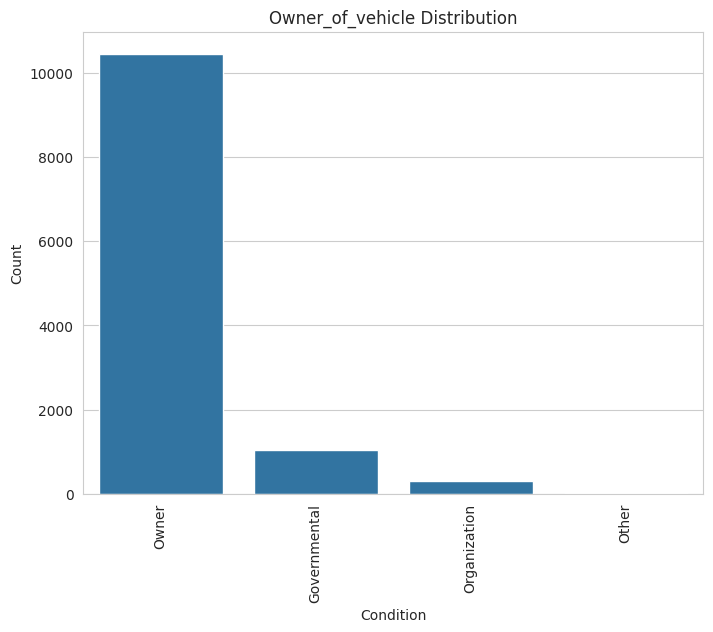

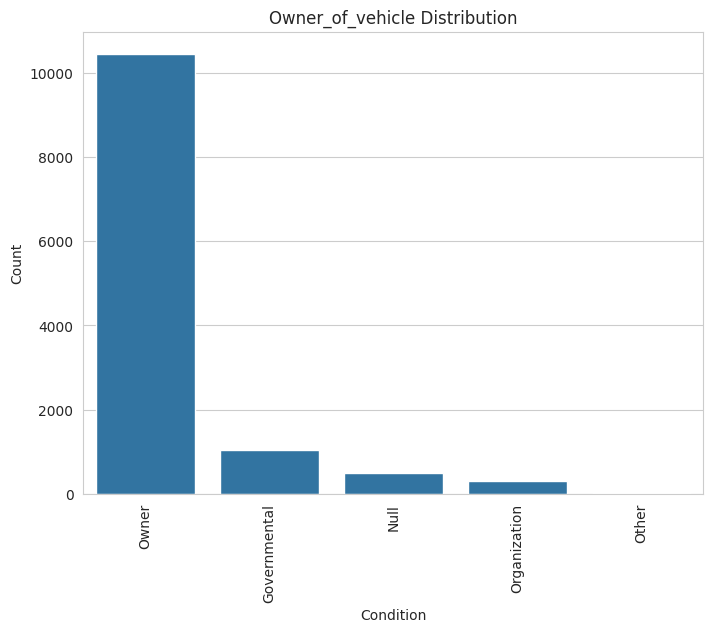

Owner_of_vehicle
Owner           10459
Governmental     1041
Null              482
Organization      312
Other              22
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the unique values in the 'Owner_of_vehicle' column
unique_conditions = df['Owner_of_vehicle'].unique()

# Plotting the graph for all unique conditions
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Owner_of_vehicle')
plt.title('Owner_of_vehicle Distribution')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Get the unique values in the 'Owner_of_vehicle' column
unique_conditions = df_copy2['Owner_of_vehicle'].unique()

# Plotting the graph for all unique conditions
plt.figure(figsize=(8, 6))
sns.countplot(data=df_copy2, x='Owner_of_vehicle')
plt.title('Owner_of_vehicle Distribution')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Get the count of each unique value in 'Owner_of_vehicle'
condition_counts1 = df_copy2['Owner_of_vehicle'].value_counts()

# Display the counts
print(condition_counts1)

In [ ]:
#filling the null vaues of 'Owner_of_vehicle' using the mode
df_copy1['Owner_of_vehicle'] = df_copy1['Owner_of_vehicle'].fillna(df['Owner_of_vehicle'].mode()[0])

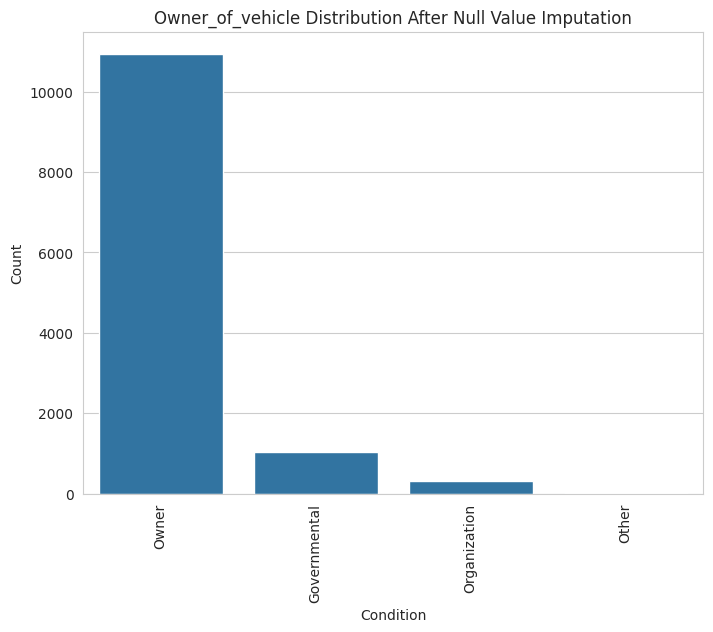

Owner_of_vehicle
Owner           10941
Governmental     1041
Organization      312
Other              22
Name: count, dtype: int64


In [ ]:
# Plot and count after null value imputation
unique_conditions = df_copy1['Owner_of_vehicle'].unique()

# Plotting the graph for all unique conditions
plt.figure(figsize=(8, 6))
sns.countplot(data=df_copy1, x='Owner_of_vehicle')
plt.title('Owner_of_vehicle Distribution After Null Value Imputation')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Get the count of each unique value in 'Owner_of_vehicle'
condition_counts1 = df_copy1['Owner_of_vehicle'].value_counts()
print(condition_counts1)

In [ ]:
# Get the count of each unique value in 'Casualty_class'
casualty_class_counts = df_copy2['Casualty_class'].value_counts()

# Get the count of each unique value in 'Sex_of_casualty'
sex_of_casualty_counts = df_copy2['Sex_of_casualty'].value_counts()

# Get the count of each unique value in 'Age_band_of_casualty'
age_band_of_casualty_counts = df_copy2['Age_band_of_casualty'].value_counts()

# Get the count of each unique value in 'Casualty_severity'
casualty_severity_counts = df_copy2['Casualty_severity'].value_counts()

# Display the counts
print("Casualty_class counts:")
print(casualty_class_counts)

print("\nSex_of_casualty counts:")
print(sex_of_casualty_counts)

print("\nAge_band_of_casualty counts:")
print(age_band_of_casualty_counts)

print("\Casualty_severity counts:")
print(casualty_severity_counts)

Casualty_class counts:
Casualty_class
Driver or rider    4944
na                 4443
Pedestrian         1649
Passenger          1280
Name: count, dtype: int64

Sex_of_casualty counts:
Sex_of_casualty
Male      5253
na        4443
Female    2620
Name: count, dtype: int64

Age_band_of_casualty counts:
Age_band_of_casualty
na          4443
18-30       3145
31-50       2455
Under 18    1035
Over 51      994
5            244
Name: count, dtype: int64
\Casualty_severity counts:
Casualty_severity
3     7076
na    4443
2      771
1       26
Name: count, dtype: int64


In [ ]:
# Drop the 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity' column from the DataFrame as 'na' values > 30%
df_copy1 = df_copy1.drop(['Casualty_class','Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity'], axis=1)

In [ ]:
# Get the count of each unique value in 'Service_year_of_vehicle'
condition_counts1 = df_copy2['Service_year_of_vehicle'].value_counts()

# Display the counts
print(condition_counts1)

Service_year_of_vehicle
Null          3928
Unknown       2883
2-5yrs        1792
Above 10yr    1324
5-10yrs       1280
1-2yr          827
Below 1yr      282
Name: count, dtype: int64


In [ ]:
# Drop the 'Service_year_of_vehicle', 'Work_of_casuality' column from the DataFrame null values > 30%
df_copy1 = df_copy1.drop(['Service_year_of_vehicle', 'Work_of_casuality'], axis=1)

In [ ]:
df_copy1.shape

(12316, 24)

In [ ]:
df_copy1.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,0
Area_accident_occured,239


In [ ]:
#again take a copy of new df_copy1 and replace 'Unknown', 'unknown', 'na', 'nan'
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Copy the original dataframe
df_copy2 = df_copy1.copy()

# Replace 'Unknown' with 'Unknown' and other placeholders with 'Null'
df_copy2 = df_copy2.replace({
    'Unknown': 'Unknown',
    'unknown': 'Unknown',
    'nan': 'Null',
    'Nan': 'Null',
    ' ': 'Null',
    pd.NA: 'Null',
    None: 'Null'
})

# Store df_copy2 after replacing placeholders
print("DataFrame after replacing placeholders:")
df_copy2.head()

DataFrame after replacing placeholders:


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,61320.0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,Not a Pedestrian,Moving Backward,Slight Injury
1,61320.0,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,...,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
2,61320.0,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,...,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Not a Pedestrian,Changing lane to the left,Serious Injury
3,3960.0,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Changing lane to the right,Slight Injury
4,3960.0,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Null,Owner,Industrial areas,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Take a copy of df_copy2 to perform encoding
df_copy3 = df_copy2.copy()

# Define nominal and ordinal columns
nominal_columns = [
    'Sex_of_driver', 'Vehicle_driver_relation', 'Type_of_vehicle', 'Owner_of_vehicle',
    'Area_accident_occured', 'Lanes_or_Medians', 'Types_of_Junction', 'Road_surface_type',
    'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision',
    'Vehicle_movement', 'Pedestrian_movement', 'Cause_of_accident'
]

ordinal_columns = [
    'Day_of_week', 'Age_band_of_driver', 'Educational_level', 'Driving_experience',
    'Road_allignment', 'Accident_severity', 'Time'
]

# Ensure all columns that will be encoded are of string type
df_copy3[nominal_columns + ordinal_columns] = df_copy3[nominal_columns + ordinal_columns].astype(str)

# One-Hot Encoding for nominal columns
onehot_encoder = OneHotEncoder(sparse_output=False)
onehot_encoded = pd.DataFrame(onehot_encoder.fit_transform(df_copy3[nominal_columns]),
                              columns=onehot_encoder.get_feature_names_out(nominal_columns))

# Dropping original nominal columns from df_copy3
df_copy3 = df_copy3.drop(nominal_columns, axis=1)

# Concatenating the one-hot encoded columns
df_copy3 = pd.concat([df_copy3, onehot_encoded], axis=1)

# Label Encoding for ordinal columns (discrete encoding)
label_encoder = LabelEncoder()

# Applying LabelEncoder to each ordinal column in df_copy3
for col in ordinal_columns:
    df_copy3[col] = label_encoder.fit_transform(df_copy3[col])

# Display the encoded DataFrame (df_copy3)
print("Encoded DataFrame (df_copy3):")
df_copy3.head()

Encoded DataFrame (df_copy3):


,Time,Day_of_week,Age_band_of_driver,Educational_level,Driving_experience,Road_allignment,Number_of_vehicles_involved,Number_of_casualties,Accident_severity,Sex_of_driver_Female,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
0,702,1,0,0,0,5,2,2,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,702,1,1,4,3,5,2,2,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,702,1,0,4,0,5,2,2,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,352,3,0,4,2,6,2,2,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,352,3,0,4,1,5,2,2,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
df_copy3.shape

(12316, 145)

In [ ]:
print(df_copy3.dtypes)

Time                               int64
Day_of_week                        int64
Age_band_of_driver                 int64
Educational_level                  int64
Driving_experience                 int64
                                  ...   
Cause_of_accident_Overspeed      float64
Cause_of_accident_Overtaking     float64
Cause_of_accident_Overturning    float64
Cause_of_accident_Turnover       float64
Cause_of_accident_Unknown        float64
Length: 145, dtype: object


In [ ]:
#finding the no of unique values per column of encoded dataset
print("Unique values per column:")
df_copy3.nunique()

Unique values per column:


,0
Time,1074
Day_of_week,7
Age_band_of_driver,5
Educational_level,7
Driving_experience,8
...,...
Cause_of_accident_Overspeed,2
Cause_of_accident_Overtaking,2
Cause_of_accident_Overturning,2
Cause_of_accident_Turnover,2


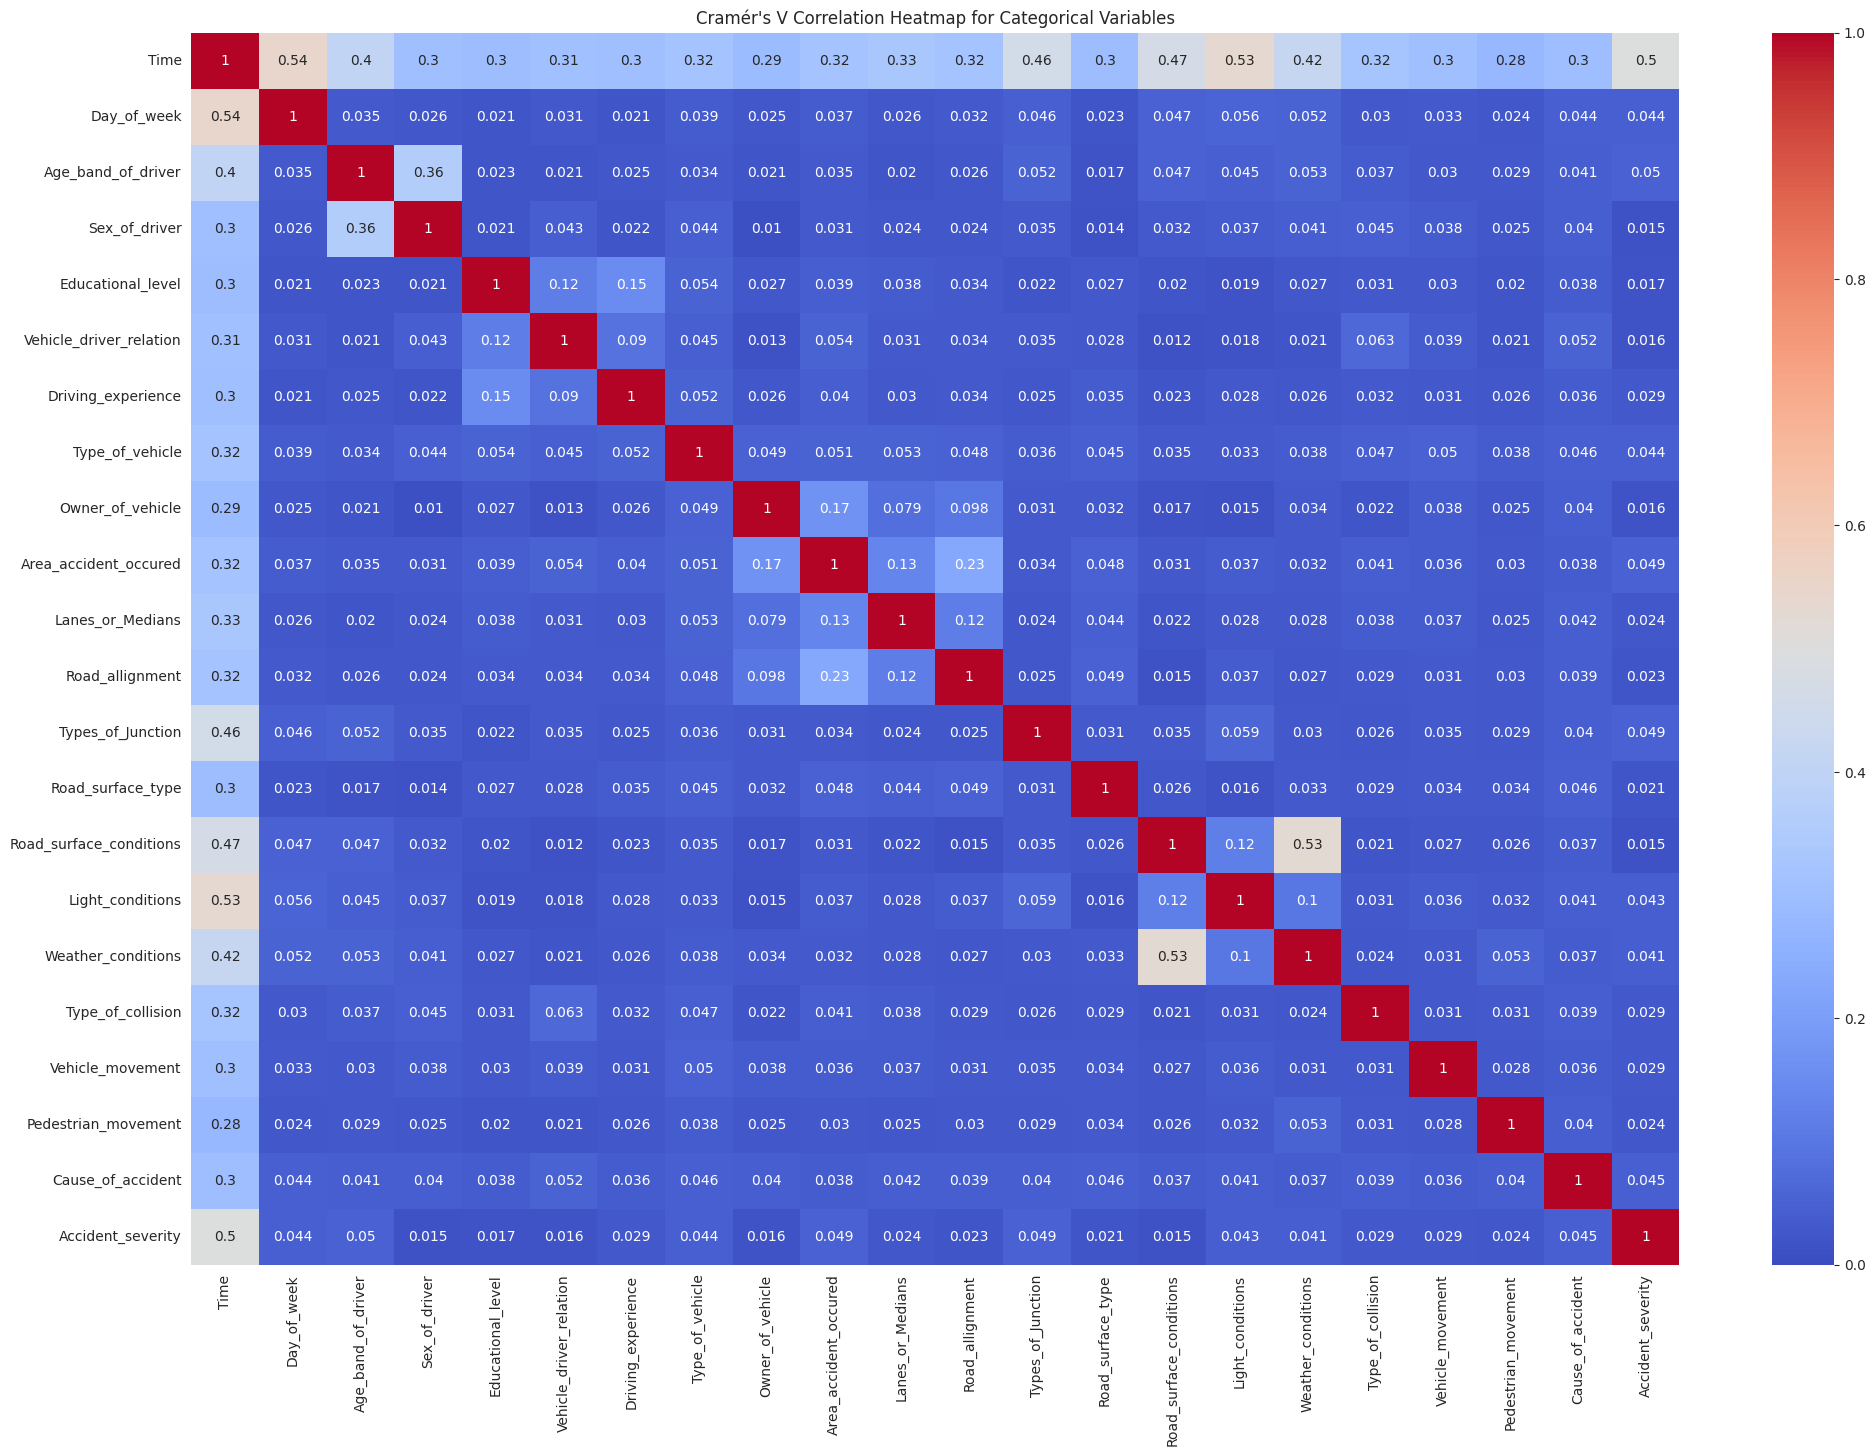

In [ ]:
#correlation matrix for categorical using cramer's v
from scipy.stats import chi2_contingency

# Function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Filter only categorical columns
categorical_cols = df_copy1.select_dtypes(include=['object']).columns

# Calculate Cramér's V matrix
cramers_v_matrix = pd.DataFrame(np.zeros((len(categorical_cols), len(categorical_cols))),
                                index=categorical_cols,
                                columns=categorical_cols)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        cramers_v_matrix.loc[col1, col2] = cramers_v(df_copy1[col1], df_copy1[col2])

# Plot heatmap
plt.figure(figsize=(24, 16))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Cramér's V Correlation Heatmap for Categorical Variables")
plt.show()

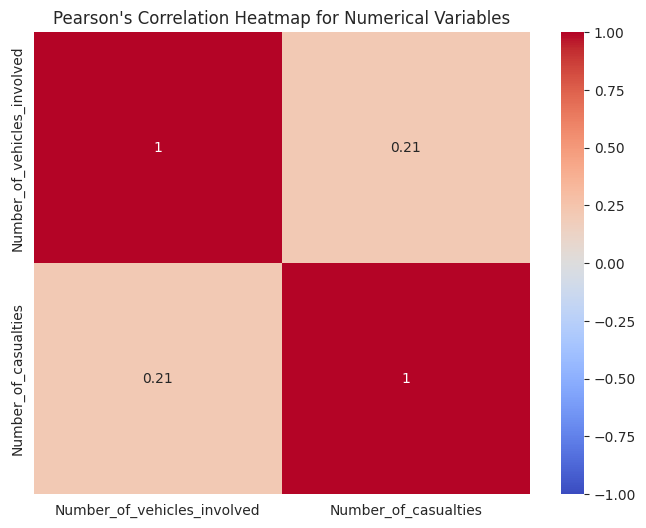

In [ ]:
#correlation matrix for numerical using Pearson's algorithm
# Filter numerical columns
numerical_cols = df_copy1.select_dtypes(include=['int64', 'float64']).columns

# Calculate Pearson's correlation matrix
pearson_corr_matrix = df_copy1[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pearson_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Pearson's Correlation Heatmap for Numerical Variables")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Define the correlated feature
correlated_feature = ['Time']

# Get the rows where 'Vehicle_driver_relation' is not 'Null' for training
train_data = df_copy2[df_copy2['Vehicle_driver_relation'] != 'Null']

# Select the rows where 'Vehicle_driver_relation' is 'Null' for testing/prediction
test_data = df_copy2[df_copy2['Vehicle_driver_relation'] == 'Null']

# Define the predictor variable for the training set (from df_copy3)
X_train = df_copy3.loc[train_data.index, correlated_feature]

# Define the predictor variable for the test set (from df_copy3)
X_test = df_copy3.loc[test_data.index, correlated_feature]

# Define the target variable for training (one-hot encoding)
y_train = train_data['Vehicle_driver_relation'].apply(lambda x: {'Employee': 0, 'Unknown': 1, 'Owner': 2, 'Other': 3}[x]).values

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict the probabilities for the test set
predictions = model.predict(X_test)

# Map the predictions back to the original categories
relation_mapping = {0: 'Employee', 1: 'Unknown', 2: 'Owner', 3: 'Other'}
predicted_categories = [relation_mapping[pred] for pred in predictions]

# Fill in the missing values in df_copy1, df_copy2 with the predicted categories
df_copy1.loc[test_data.index, 'Vehicle_driver_relation'] = predicted_categories

# Optional: Calculate the evaluation metrics on the training set
y_train_pred = model.predict(X_train)

accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred, average='weighted', zero_division=0)
recall = recall_score(y_train, y_train_pred, average='weighted', zero_division=0)
f1 = f1_score(y_train, y_train_pred, average='weighted', zero_division=0)

# Print the results
print(f'\nAccuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.8281502939422339
Precision: 0.806107536076578
Recall: 0.8281502939422339
F1 Score: 0.7679687408029091


In [ ]:
df_copy1.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,0
Area_accident_occured,239


In [ ]:
#again take a copy of new df_copy1 and replace 'Unknown', 'unknown', 'na', 'nan'
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Copy the original dataframe
df_copy2 = df_copy1.copy()

# Replace 'Unknown' with 'Unknown' and other placeholders with 'Null'
df_copy2 = df_copy2.replace({
    'Unknown': 'Unknown',
    'unknown': 'Unknown',
    'nan': 'Null',
    'Nan': 'Null',
    ' ': 'Null',
    pd.NA: 'Null',
    None: 'Null'
})

# Store df_copy2 after replacing placeholders
print("DataFrame after replacing placeholders:")
df_copy2.head()

DataFrame after replacing placeholders:


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,61320.0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,Not a Pedestrian,Moving Backward,Slight Injury
1,61320.0,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,...,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
2,61320.0,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,...,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Not a Pedestrian,Changing lane to the left,Serious Injury
3,3960.0,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Changing lane to the right,Slight Injury
4,3960.0,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Null,Owner,Industrial areas,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import joblib
from google.colab import files  # Import for downloading files

# Take a copy of df_copy2 to perform encoding
df_copy3 = df_copy2.copy()

# Define nominal and ordinal columns
nominal_columns = [
    'Sex_of_driver', 'Vehicle_driver_relation', 'Type_of_vehicle', 'Owner_of_vehicle',
    'Area_accident_occured', 'Lanes_or_Medians', 'Types_of_Junction', 'Road_surface_type',
    'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision',
    'Vehicle_movement', 'Pedestrian_movement', 'Cause_of_accident'
]

ordinal_columns = [
    'Day_of_week', 'Age_band_of_driver', 'Educational_level', 'Driving_experience',
    'Road_allignment', 'Accident_severity', 'Time'
]

# Ensure all columns that will be encoded are of string type
df_copy3[nominal_columns + ordinal_columns] = df_copy3[nominal_columns + ordinal_columns].astype(str)

# One-Hot Encoding for nominal columns
onehot_encoder = OneHotEncoder(sparse_output=False)
onehot_encoded = pd.DataFrame(onehot_encoder.fit_transform(df_copy3[nominal_columns]),
                              columns=onehot_encoder.get_feature_names_out(nominal_columns))

# Dropping original nominal columns from df_copy3
df_copy3 = df_copy3.drop(nominal_columns, axis=1)

# Concatenating the one-hot encoded columns
df_copy3 = pd.concat([df_copy3, onehot_encoded], axis=1)

# Convert one-hot encoded values from float to int
df_copy3[onehot_encoded.columns] = df_copy3[onehot_encoded.columns].astype(int)

# Initialize a dictionary to store label encoders
label_encoders = {}

# Label Encoding for ordinal columns (discrete encoding)
for col in ordinal_columns:
    le = LabelEncoder()
    df_copy3[col] = le.fit_transform(df_copy3[col])
    label_encoders[col] = le  # Store the label encoder for each column

# Save each LabelEncoder to disk for later use during predictions
for col, le in label_encoders.items():
    encoder_path = f'./{col}_encoder.pkl'
    joblib.dump(le, encoder_path)  # Save the label encoder for each column
    files.download(encoder_path)  # Download the saved label encoder

# Save the OneHotEncoder to disk
onehot_encoder_path = './onehot_encoder.pkl'
joblib.dump(onehot_encoder, onehot_encoder_path)  # Save the OneHotEncoder
files.download(onehot_encoder_path)  # Download the saved OneHotEncoder

# Display the encoded DataFrame (df_copy3)
print("Encoded DataFrame (df_copy3):")
df_copy3.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Encoded DataFrame (df_copy3):


,Time,Day_of_week,Age_band_of_driver,Educational_level,Driving_experience,Road_allignment,Number_of_vehicles_involved,Number_of_casualties,Accident_severity,Sex_of_driver_Female,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
0,702,1,0,0,0,5,2,2,2,0,...,0,0,0,0,0,0,0,0,0,0
1,702,1,1,4,3,5,2,2,2,0,...,0,0,0,0,0,0,1,0,0,0
2,702,1,0,4,0,5,2,2,1,0,...,0,0,0,0,0,0,0,0,0,0
3,352,3,0,4,2,6,2,2,2,0,...,0,0,0,0,0,0,0,0,0,0
4,352,3,0,4,1,5,2,2,2,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
df_copy3.dtypes

,0
Time,int64
Day_of_week,int64
Age_band_of_driver,int64
Educational_level,int64
Driving_experience,int64
...,...
Cause_of_accident_Overspeed,int64
Cause_of_accident_Overtaking,int64
Cause_of_accident_Overturning,int64
Cause_of_accident_Turnover,int64


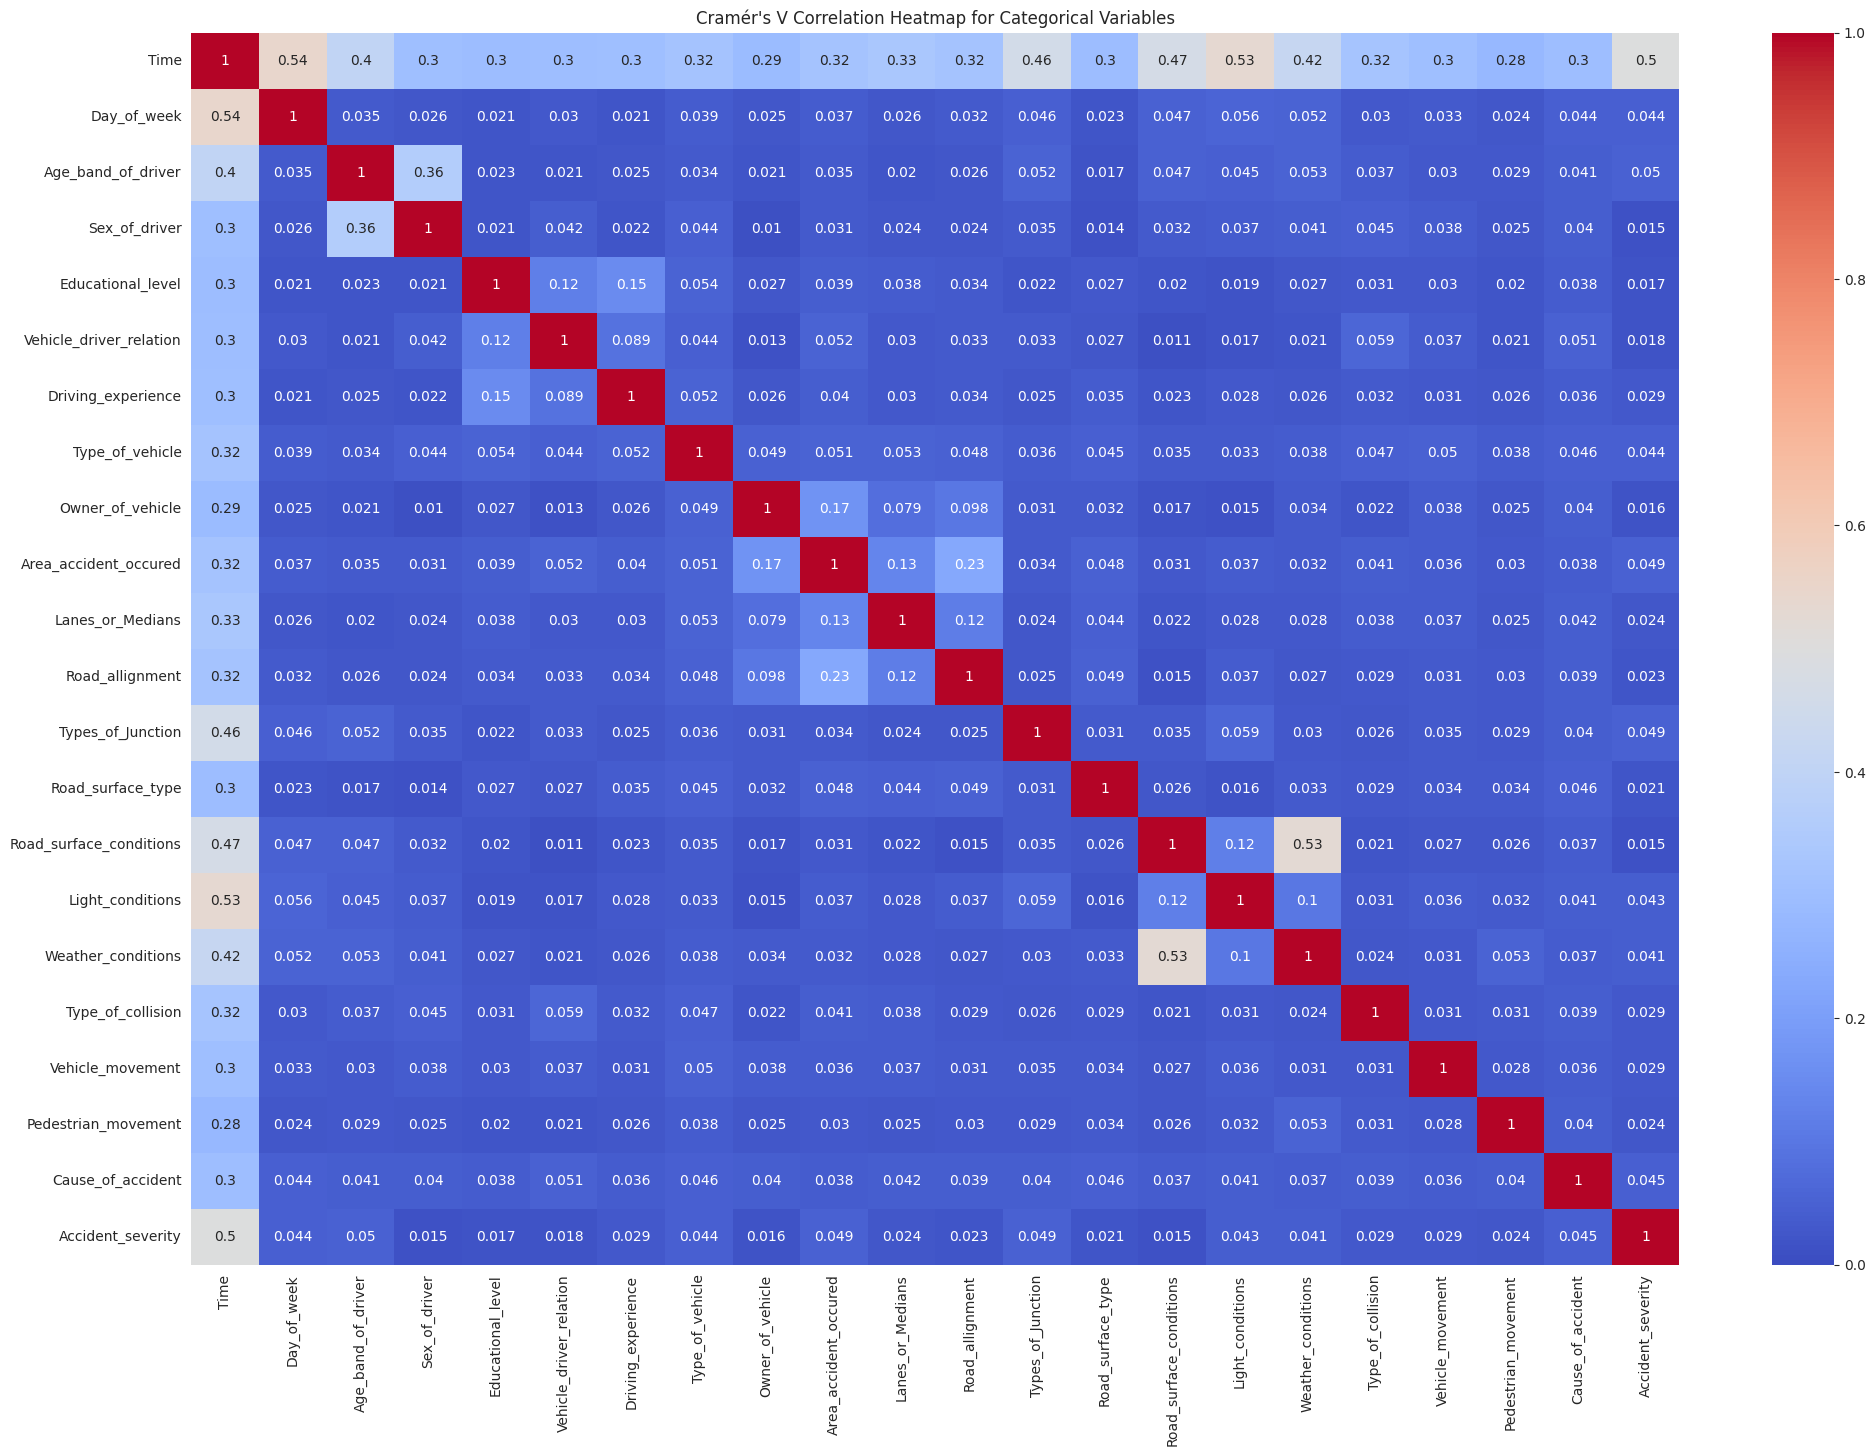

In [ ]:
#correlation matrix for categorical using cramer's v
from scipy.stats import chi2_contingency

# Function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Filter only categorical columns
categorical_cols = df_copy1.select_dtypes(include=['object']).columns

# Calculate Cramér's V matrix
cramers_v_matrix = pd.DataFrame(np.zeros((len(categorical_cols), len(categorical_cols))),
                                index=categorical_cols,
                                columns=categorical_cols)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        cramers_v_matrix.loc[col1, col2] = cramers_v(df_copy1[col1], df_copy1[col2])

# Plot heatmap
plt.figure(figsize=(24, 16))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Cramér's V Correlation Heatmap for Categorical Variables")
plt.show()

In [ ]:
df_copy1.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,0
Area_accident_occured,239


In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Define the columns to impute
columns_to_impute = ['Type_of_vehicle_Null', 'Area_accident_occured_Null', 'Lanes_or_Medians_Null', 'Types_of_Junction_Null']

# Replace 1 in Null columns back to NaN for imputation
df_copy3['Type_of_vehicle_Null'] = df_copy3['Type_of_vehicle_Null'].replace(1, np.nan)
df_copy3['Area_accident_occured_Null'] = df_copy3['Area_accident_occured_Null'].replace(1, np.nan)
df_copy3['Lanes_or_Medians_Null'] = df_copy3['Lanes_or_Medians_Null'].replace(1, np.nan)
df_copy3['Types_of_Junction_Null'] = df_copy3['Types_of_Junction_Null'].replace(1, np.nan)

# Create a copy of the DataFrame for imputation
df_impute_copy = df_copy3[columns_to_impute].copy()

# Ensure all columns are of float type
df_impute_copy = df_impute_copy.astype(float)

# Save original data for evaluation (before introducing more NaN)
original_values = df_impute_copy.copy()

# Simulate missing values (e.g., randomly mask 20% of the existing data)
np.random.seed(42)
mask = np.random.rand(*df_impute_copy.shape) < 0.2  # 20% missing
df_impute_copy[mask] = np.nan  # Introduce NaN values for evaluation

# Prepare the KNN imputer
knn_imputer = KNNImputer(n_neighbors=3)

# Perform KNN imputation
df_imputed = pd.DataFrame(knn_imputer.fit_transform(df_impute_copy), columns=df_impute_copy.columns)

# Evaluate the imputation by comparing imputed values with the original values
for column in columns_to_impute:
    true_values = original_values.loc[mask[:, columns_to_impute.index(column)], column]
    imputed_values = df_imputed.loc[mask[:, columns_to_impute.index(column)], column].round()

    # Drop rows where either true_values or imputed_values is NaN
    valid_idx = ~np.isnan(true_values) & ~np.isnan(imputed_values)
    true_values_valid = true_values[valid_idx]
    imputed_values_valid = imputed_values[valid_idx]

    if len(true_values_valid) > 0:
        # Calculate evaluation metrics for each column
        accuracy = accuracy_score(true_values_valid, imputed_values_valid)
        precision = precision_score(true_values_valid, imputed_values_valid, average='weighted', zero_division=0)
        recall = recall_score(true_values_valid, imputed_values_valid, average='weighted', zero_division=0)
        f1 = f1_score(true_values_valid, imputed_values_valid, average='weighted', zero_division=0)

        print(f"\nEvaluation metrics for {column}:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
    else:
        print(f"\nSkipping evaluation for {column} due to lack of valid data.")

# Update df_copy3 with the imputed values
df_copy3[columns_to_impute] = df_imputed

# Check if null values have been successfully filled
null_values_final = df_copy3[columns_to_impute].isnull().sum()
print("\nNull values after updating df_copy3:\n", null_values_final)


Evaluation metrics for Type_of_vehicle_Null:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Evaluation metrics for Area_accident_occured_Null:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Evaluation metrics for Lanes_or_Medians_Null:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Evaluation metrics for Types_of_Junction_Null:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Null values after updating df_copy3:
 Type_of_vehicle_Null          0
Area_accident_occured_Null    0
Lanes_or_Medians_Null         0
Types_of_Junction_Null        0
dtype: int64


In [ ]:
# Drop the columns used to indicate null values (if they are no longer needed)
df_copy3 = df_copy3.drop(columns=columns_to_impute)
df_copy3.head()

,Time,Day_of_week,Age_band_of_driver,Educational_level,Driving_experience,Road_allignment,Number_of_vehicles_involved,Number_of_casualties,Accident_severity,Sex_of_driver_Female,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
0,702,1,0,0,0,5,2,2,2,0,...,0,0,0,0,0,0,0,0,0,0
1,702,1,1,4,3,5,2,2,2,0,...,0,0,0,0,0,0,1,0,0,0
2,702,1,0,4,0,5,2,2,1,0,...,0,0,0,0,0,0,0,0,0,0
3,352,3,0,4,2,6,2,2,2,0,...,0,0,0,0,0,0,0,0,0,0
4,352,3,0,4,1,5,2,2,2,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
df_copy3.shape

(12316, 140)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

df_copy3['Driving_experience'] = df_copy3['Driving_experience'].replace(6, np.nan)

missing_values_count = df_copy3['Driving_experience'].isna().sum()

# Define the correlated features
correlated_features = df_copy3.columns.drop('Driving_experience')

train_data = df_copy3[df_copy3['Driving_experience'].notna()]
test_data = df_copy3[df_copy3['Driving_experience'].isna()]

X_train = train_data[correlated_features]
X_test = test_data[correlated_features]

# Define the target variable for training
y_train = train_data['Driving_experience'].values

# Ensure X_test is not empty before fitting the model
if X_test.shape[0] == 0:
    print("No rows with missing 'Driving_experience' to predict.")
else:
    # Train a Gradient Boosting Classifier model
    model = GradientBoostingClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Predict the missing values for the test set
    predictions = model.predict(X_test)

    # Fill in the missing values in df_copy3 with the predicted values
    df_copy3.loc[test_data.index, 'Driving_experience'] = predictions

    # Calculate the evaluation metrics on the training set
    y_train_pred = model.predict(X_train)

    accuracy = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred, average='weighted', zero_division=0)
    recall = recall_score(y_train, y_train_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_train, y_train_pred, average='weighted', zero_division=0)

    # Print the evaluation metrics
    print(f'\nAccuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')


Accuracy: 0.4047
Precision: 0.5049
Recall: 0.4047
F1 Score: 0.3557


In [ ]:
df_copy3.groupby('Accident_severity').size()

,0
Accident_severity,
0,158
1,1743
2,10415


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import joblib  # Import joblib for saving the scaler
from google.colab import files

# Assuming df_copy3 is already defined and contains your data
X = df_copy3.drop(columns=['Accident_severity'])  # Features
y = df_copy3['Accident_severity']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use transform here

# Save the scaler as a .pkl file
joblib.dump(scaler, 'scaler.pkl')

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the scaled training data
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Check the new class distribution after SMOTE
print("Original Accident_severity distribution:\n", y_train.value_counts())
print("Resampled Accident_severity distribution:\n", pd.Series(y_train_smote).value_counts())

# Download the scaler.pkl file
files.download('scaler.pkl')

Original Accident_severity distribution:
 Accident_severity
2    8331
1    1394
0     127
Name: count, dtype: int64
Resampled Accident_severity distribution:
 Accident_severity
2    8331
1    8331
0    8331
Name: count, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Model Training

In [ ]:
# 1
#Applying RandomForestClassifier with SMOTE technique
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Model Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

# Model Prediction (on the test dataset)
y_pred = model.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)

# Weighted metrics
precision_weighted = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall_weighted = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1_weighted = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Micro metrics
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')
f1_micro = f1_score(y_test, y_pred, average='micro')

# Cross-Validation
cv_scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='f1_macro')

# Print the evaluation metrics
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Weighted Precision: {precision_weighted * 100:.2f}%')
print(f'Weighted Recall: {recall_weighted * 100:.2f}%')
print(f'Weighted F1 Score: {f1_weighted * 100:.2f}%')

print(f'Micro Precision: {precision_micro * 100:.2f}%')
print(f'Micro Recall: {recall_micro * 100:.2f}%')
print(f'Micro F1 Score: {f1_micro * 100:.2f}%')

# Print cross-validation scores
print(f'Cross-Validation F1 Scores: {cv_scores}')
print(f'Mean Cross-Validation F1 Score: {cv_scores.mean() * 100:.2f}%')

Accuracy: 84.70%
Weighted Precision: 82.98%
Weighted Recall: 84.70%
Weighted F1 Score: 77.88%
Micro Precision: 84.70%
Micro Recall: 84.70%
Micro F1 Score: 84.70%
Cross-Validation F1 Scores: [0.67508273 0.99799955 0.99859986 0.99879952 0.99859974]
Mean Cross-Validation F1 Score: 93.38%


In [ ]:
# 2
# Gradient Boosting Classifier (with SMOTE)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

# Model Training using Gradient Boosting Classifier
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

# Model Prediction (on the test set)
y_pred = model.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)

# Weighted metrics
precision_weighted = precision_score(y_test, y_pred, average='weighted')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

# Micro metrics
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')
f1_micro = f1_score(y_test, y_pred, average='micro')

# Cross-Validation
cv_scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='f1_macro')

# Print the evaluation metrics
print("\nEvaluation Metrics:")
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Weighted Precision: {precision_weighted * 100:.2f}%')
print(f'Weighted Recall: {recall_weighted * 100:.2f}%')
print(f'Weighted F1 Score: {f1_weighted * 100:.2f}%')

print(f'Micro Precision: {precision_micro * 100:.2f}%')
print(f'Micro Recall: {recall_micro * 100:.2f}%')
print(f'Micro F1 Score: {f1_micro * 100:.2f}%')

# Print cross-validation scores
print(f'Cross-Validation F1 Scores: {cv_scores}')
print(f'Mean Cross-Validation F1 Score: {cv_scores.mean() * 100:.2f}%')


Evaluation Metrics:
Accuracy: 84.50%
Weighted Precision: 83.08%
Weighted Recall: 84.50%
Weighted F1 Score: 78.61%
Micro Precision: 84.50%
Micro Recall: 84.50%
Micro F1 Score: 84.50%
Cross-Validation F1 Scores: [0.62663964 0.95273922 0.94761676 0.94897258 0.95066011]
Mean Cross-Validation F1 Score: 88.53%


In [ ]:
# 3
# XGBoost Classifier (with SMOTE)
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

# Initialize XGBoost Classifier for multiclass classification
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

# Train the model
xgb_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)

# Weighted metrics
precision_weighted = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall_weighted = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1_weighted = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Micro metrics
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')
f1_micro = f1_score(y_test, y_pred, average='micro')

# Cross-Validation
cv_scores = cross_val_score(xgb_model, X_train_smote, y_train_smote, cv=5, scoring='f1_macro')

# Output the results
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Weighted Precision: {precision_weighted * 100:.2f}%')
print(f'Weighted Recall: {recall_weighted * 100:.2f}%')
print(f'Weighted F1 Score: {f1_weighted * 100:.2f}%')

print(f'Micro Precision: {precision_micro * 100:.2f}%')
print(f'Micro Recall: {recall_micro * 100:.2f}%')
print(f'Micro F1 Score: {f1_micro * 100:.2f}%')

# Print cross-validation scores
print(f'Cross-Validation F1 Scores: {cv_scores}')
print(f'Mean Cross-Validation F1 Score: {cv_scores.mean() * 100:.2f}%')

Accuracy: 85.19%
Weighted Precision: 81.89%
Weighted Recall: 85.19%
Weighted F1 Score: 80.22%
Micro Precision: 85.19%
Micro Recall: 85.19%
Micro F1 Score: 85.19%
Cross-Validation F1 Scores: [0.64605113 0.99019364 0.98939013 0.98878993 0.99099377]
Mean Cross-Validation F1 Score: 92.11%


In [ ]:
#4
# Neural Networks (Multi-Layer Perceptron) (with SMOTE)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

# Model Training
model = MLPClassifier(random_state=42, max_iter=300)
model.fit(X_train_smote, y_train_smote)

# Model Prediction
y_pred = model.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)

# Weighted metrics
precision_weighted = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall_weighted = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1_weighted = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Micro metrics
precision_micro = precision_score(y_test, y_pred, average='micro', zero_division=0)
recall_micro = recall_score(y_test, y_pred, average='micro', zero_division=0)
f1_micro = f1_score(y_test, y_pred, average='micro', zero_division=0)

# Cross-Validation
cv_scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='f1_macro')

# Print the evaluation metrics
print("\nEvaluation Metrics:")
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Weighted Precision: {precision_weighted * 100:.2f}%')
print(f'Weighted Recall: {recall_weighted * 100:.2f}%')
print(f'Weighted F1 Score: {f1_weighted * 100:.2f}%')

print(f'Micro Precision: {precision_micro * 100:.2f}%')
print(f'Micro Recall: {recall_micro * 100:.2f}%')
print(f'Micro F1 Score: {f1_micro * 100:.2f}%')

# Print cross-validation scores
print(f'Cross-Validation F1 Scores: {cv_scores}')
print(f'Mean Cross-Validation F1 Score: {cv_scores.mean() * 100:.2f}%')


Evaluation Metrics:
Accuracy: 76.22%
Weighted Precision: 75.13%
Weighted Recall: 76.22%
Weighted F1 Score: 75.66%
Micro Precision: 76.22%
Micro Recall: 76.22%
Micro F1 Score: 76.22%
Cross-Validation F1 Scores: [0.91028522 0.95058089 0.94454132 0.95103233 0.94888748]
Mean Cross-Validation F1 Score: 94.11%


In [ ]:
#5
# Decision Trees (with SMOTE)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Model Training
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

# Model Prediction
y_pred = model.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)

# Weighted metrics
precision_weighted = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall_weighted = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1_weighted = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Micro metrics
precision_micro = precision_score(y_test, y_pred, average='micro', zero_division=0)
recall_micro = recall_score(y_test, y_pred, average='micro', zero_division=0)
f1_micro = f1_score(y_test, y_pred, average='micro', zero_division=0)

# Cross-Validation
cv_scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='f1_macro')

# Print the evaluation metrics
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Weighted Precision: {precision_weighted * 100:.2f}%')
print(f'Weighted Recall: {recall_weighted * 100:.2f}%')
print(f'Weighted F1 Score: {f1_weighted * 100:.2f}%')

print(f'Micro Precision: {precision_micro * 100:.2f}%')
print(f'Micro Recall: {recall_micro * 100:.2f}%')
print(f'Micro F1 Score: {f1_micro * 100:.2f}%')

# Print cross-validation scores
print(f'Cross-Validation F1 Scores: {cv_scores}')
print(f'Mean Cross-Validation F1 Score: {cv_scores.mean() * 100:.2f}%')

Accuracy: 75.65%
Weighted Precision: 76.96%
Weighted Recall: 75.65%
Weighted F1 Score: 76.27%
Micro Precision: 75.65%
Micro Recall: 75.65%
Micro F1 Score: 75.65%
Cross-Validation F1 Scores: [0.71601609 0.91565131 0.9079243  0.92033456 0.92473576]
Mean Cross-Validation F1 Score: 87.69%


In [ ]:
# 6
# Applying SVC with SMOTE technique
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Creating and training the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_smote, y_train_smote)

# Making predictions
y_pred = svm_model.predict(X_test_scaled)

# Calculating accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Output the results
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

Accuracy: 45.94%
Precision: 76.32%
Recall: 45.94%
F1 Score: 54.72%


In [ ]:
# 7
# Applying KNN with SMOTE technique
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_smote, y_train_smote)

# Model Prediction
y_pred = knn.predict(X_test_scaled)

# Step 3: Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the predicted values
print("Predicted values for Accident_severity:")
print(y_pred)

# Print the evaluation metrics
print("\nEvaluation Metrics:")
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

Predicted values for Accident_severity:
[1 2 0 ... 1 2 2]

Evaluation Metrics:
Accuracy: 46.19%
Precision: 74.95%
Recall: 46.19%
F1 Score: 54.07%


In [ ]:
# 8
#Logistic Regression (One-vs-Rest) (with SMOTE)
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler

# Model Training using One-vs-Rest Classifier
model = OneVsRestClassifier(LogisticRegression(random_state=42, solver='lbfgs', max_iter=500))
model.fit(X_train_smote, y_train_smote)

# Model Prediction
y_pred = model.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

Accuracy: 49.84%
Precision: 75.98%
Recall: 49.84%
F1 Score: 58.41%


In [ ]:
# 9
#Naive Bayes (with SMOTE)
from sklearn.naive_bayes import GaussianNB

# Model Training
model = GaussianNB()
model.fit(X_train_smote, y_train_smote)

# Model Prediction
y_pred = model.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the predicted values
print("Predicted values for Accident_severity:")
print(y_pred)

# Print the evaluation metrics
print("\nEvaluation Metrics:")
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

Predicted values for Accident_severity:
[0 0 0 ... 0 2 0]

Evaluation Metrics:
Accuracy: 9.21%
Precision: 77.37%
Recall: 9.21%
F1 Score: 13.42%


Parameter fine tuning

In [ ]:
# Parameter fine tuning for DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the parameter grid to tune
param_grid = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_smote, y_train_smote)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

# Calculate micro metrics
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')
f1_micro = f1_score(y_test, y_pred, average='micro')

# Print the best hyperparameters and evaluation metrics
print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Weighted Precision: {precision_weighted * 100:.2f}%')
print(f'Weighted Recall: {recall_weighted * 100:.2f}%')
print(f'Weighted F1 Score: {f1_weighted * 100:.2f}%')

# Print micro metrics
print(f'Micro Precision: {precision_micro * 100:.2f}%')
print(f'Micro Recall: {recall_micro * 100:.2f}%')
print(f'Micro F1 Score: {f1_micro * 100:.2f}%')

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 79.26%
Weighted Precision: 77.12%
Weighted Recall: 79.26%
Weighted F1 Score: 78.08%
Micro Precision: 79.26%
Micro Recall: 79.26%
Micro F1 Score: 79.26%


In [ ]:
# Parameter fine-tuning the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200],  # Reduced range for faster tuning
    'max_depth': [5, 10, 20],  # Limiting tree depth to avoid long trees
    'min_samples_split': [2, 10],  # Fewer options for faster execution
    'min_samples_leaf': [1, 5],  # Fewer options for faster execution
    'max_features': ['sqrt', 'log2'],  # Simplified the number of options
    'bootstrap': [True, False]  # Keeping both options for flexibility
}

# Initialize the RandomForest model
rf = RandomForestClassifier(random_state=42)

# Use RandomizedSearchCV to find the best parameters (with 3-fold CV and a limited number of iterations)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,  # Specify a limited number of random combinations (e.g., 20)
    cv=3,  # Reduce cross-validation folds to 3
    n_jobs=-1,  # Use all available cores
    verbose=1,
    random_state=42
)

# Fit RandomizedSearchCV on the SMOTE data
random_search.fit(X_train_smote, y_train_smote)

# Get the best model from RandomizedSearch
best_rf_model = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

# Calculate micro metrics
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')
f1_micro = f1_score(y_test, y_pred, average='micro')

# Print the best hyperparameters and evaluation metrics
print(f'Best hyperparameters: {random_search.best_params_}')
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Weighted Precision: {precision_weighted * 100:.2f}%')
print(f'Weighted Recall: {recall_weighted * 100:.2f}%')
print(f'Weighted F1 Score: {f1_weighted * 100:.2f}%')

# Print micro metrics
print(f'Micro Precision: {precision_micro * 100:.2f}%')
print(f'Micro Recall: {recall_micro * 100:.2f}%')
print(f'Micro F1 Score: {f1_micro * 100:.2f}%')

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': False}
Accuracy: 84.78%
Weighted Precision: 84.77%
Weighted Recall: 84.78%
Weighted F1 Score: 78.07%
Micro Precision: 84.78%
Micro Recall: 84.78%
Micro F1 Score: 84.78%


In [ ]:
# Parameter fine tuning for NN Multi Layer percepton Classifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.exceptions import ConvergenceWarning
import warnings
import joblib  # To save the model

# Ignore convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Define a smaller parameter grid for tuning
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant'],
    'max_iter': [200, 300],
    'learning_rate_init': [0.001, 0.01]
}

# Initialize the MLPClassifier
mlp = MLPClassifier(random_state=42)

# Use GridSearchCV to find the best hyperparameters with reduced computation
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train_smote, y_train_smote)

# Get the best model after tuning
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)

# Calculate evaluation metrics (both weighted and micro)
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')
f1_micro = f1_score(y_test, y_pred, average='micro')

# Print the best hyperparameters and evaluation metrics
print(f'Best hyperparameters found: {grid_search.best_params_}')
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Weighted Precision: {precision_weighted * 100:.2f}%')
print(f'Weighted Recall: {recall_weighted * 100:.2f}%')
print(f'Weighted F1 Score: {f1_weighted * 100:.2f}%')

print(f'Micro Precision: {precision_micro * 100:.2f}%')
print(f'Micro Recall: {recall_micro * 100:.2f}%')
print(f'Micro F1 Score: {f1_micro * 100:.2f}%')

# Save the best model for future use
joblib.dump(best_model, 'best_mlp_model.pkl')
print("Best model saved as 'best_mlp_model.pkl'")

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best hyperparameters found: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'max_iter': 200, 'solver': 'adam'}
Accuracy: 76.83%
Weighted Precision: 75.54%
Weighted Recall: 76.83%
Weighted F1 Score: 76.15%
Micro Precision: 76.83%
Micro Recall: 76.83%
Micro F1 Score: 76.83%
Best model saved as 'best_mlp_model.pkl'


In [ ]:
# Parameter fine tuning for XGBoost Classifier
import pandas as pd
import xgboost as xgb
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    colsample_bytree=0.8,   # Increase feature subsampling
    gamma=1,                # Add regularization to reduce overfitting
    learning_rate=0.1,      # Decrease learning rate for better convergence
    max_depth=6,            # Try reducing the depth to avoid overfitting
    n_estimators=500,       # Increase number of trees
    subsample=0.8,          # Use 80% of data for training each tree
)

# Train the model on the SMOTE-resampled training data
xgb_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

# Micro metrics
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')
f1_micro = f1_score(y_test, y_pred, average='micro')

# Output results
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Weighted Precision: {precision_weighted * 100:.2f}%')
print(f'Weighted Recall: {recall_weighted * 100:.2f}%')
print(f'Weighted F1 Score: {f1_weighted * 100:.2f}%')

print(f'Micro Precision: {precision_micro * 100:.2f}%')
print(f'Micro Recall: {recall_micro * 100:.2f}%')
print(f'Micro F1 Score: {f1_micro * 100:.2f}%')

# Save the model and feature names
model_filename = 'xgb_model.joblib'
feature_filename = 'feature_names.pkl'

joblib.dump(xgb_model, model_filename)
feature_names = X.columns.tolist()  # Get feature names from the DataFrame
joblib.dump(feature_names, feature_filename)

# To load the model and feature names later:
loaded_model = joblib.load(model_filename)
loaded_feature_names = joblib.load(feature_filename)
print(loaded_feature_names)

Accuracy: 85.19%
Weighted Precision: 83.03%
Weighted Recall: 85.19%
Weighted F1 Score: 79.54%
Micro Precision: 85.19%
Micro Recall: 85.19%
Micro F1 Score: 85.19%
['Time', 'Day_of_week', 'Age_band_of_driver', 'Educational_level', 'Driving_experience', 'Road_allignment', 'Number_of_vehicles_involved', 'Number_of_casualties', 'Sex_of_driver_Female', 'Sex_of_driver_Male', 'Sex_of_driver_Unknown', 'Vehicle_driver_relation_Employee', 'Vehicle_driver_relation_Other', 'Vehicle_driver_relation_Owner', 'Vehicle_driver_relation_Unknown', 'Type_of_vehicle_Automobile', 'Type_of_vehicle_Bajaj', 'Type_of_vehicle_Bicycle', 'Type_of_vehicle_Long lorry', 'Type_of_vehicle_Lorry (11?40Q)', 'Type_of_vehicle_Lorry (41?100Q)', 'Type_of_vehicle_Motorcycle', 'Type_of_vehicle_Other', 'Type_of_vehicle_Pick up upto 10Q', 'Type_of_vehicle_Public (12 seats)', 'Type_of_vehicle_Public (13?45 seats)', 'Type_of_vehicle_Public (> 45 seats)', 'Type_of_vehicle_Ridden horse', 'Type_of_vehicle_Special vehicle', 'Type_of_veh

In [ ]:
# With the use of Grid Search finding the best parameters for XGBoost
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Create an XGBoost model
xgb_model = xgb.XGBClassifier()

# Define the grid of hyperparameters to search
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'gamma': [0, 1, 5]
}

# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Perform grid search with multiple metrics
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring=scoring, refit='f1', cv=5, verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters and scores
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_]}")
print(f"Best precision: {grid_search.cv_results_['mean_test_precision'][grid_search.best_index_]}")
print(f"Best recall: {grid_search.cv_results_['mean_test_recall'][grid_search.best_index_]}")
print(f"Best F1 score: {grid_search.best_score_}")  # Since refit is on 'f1'

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


KeyboardInterrupt: 